<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/141_DOE_Python_y_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El Problema a Resolver - Un diseño $3^3$**

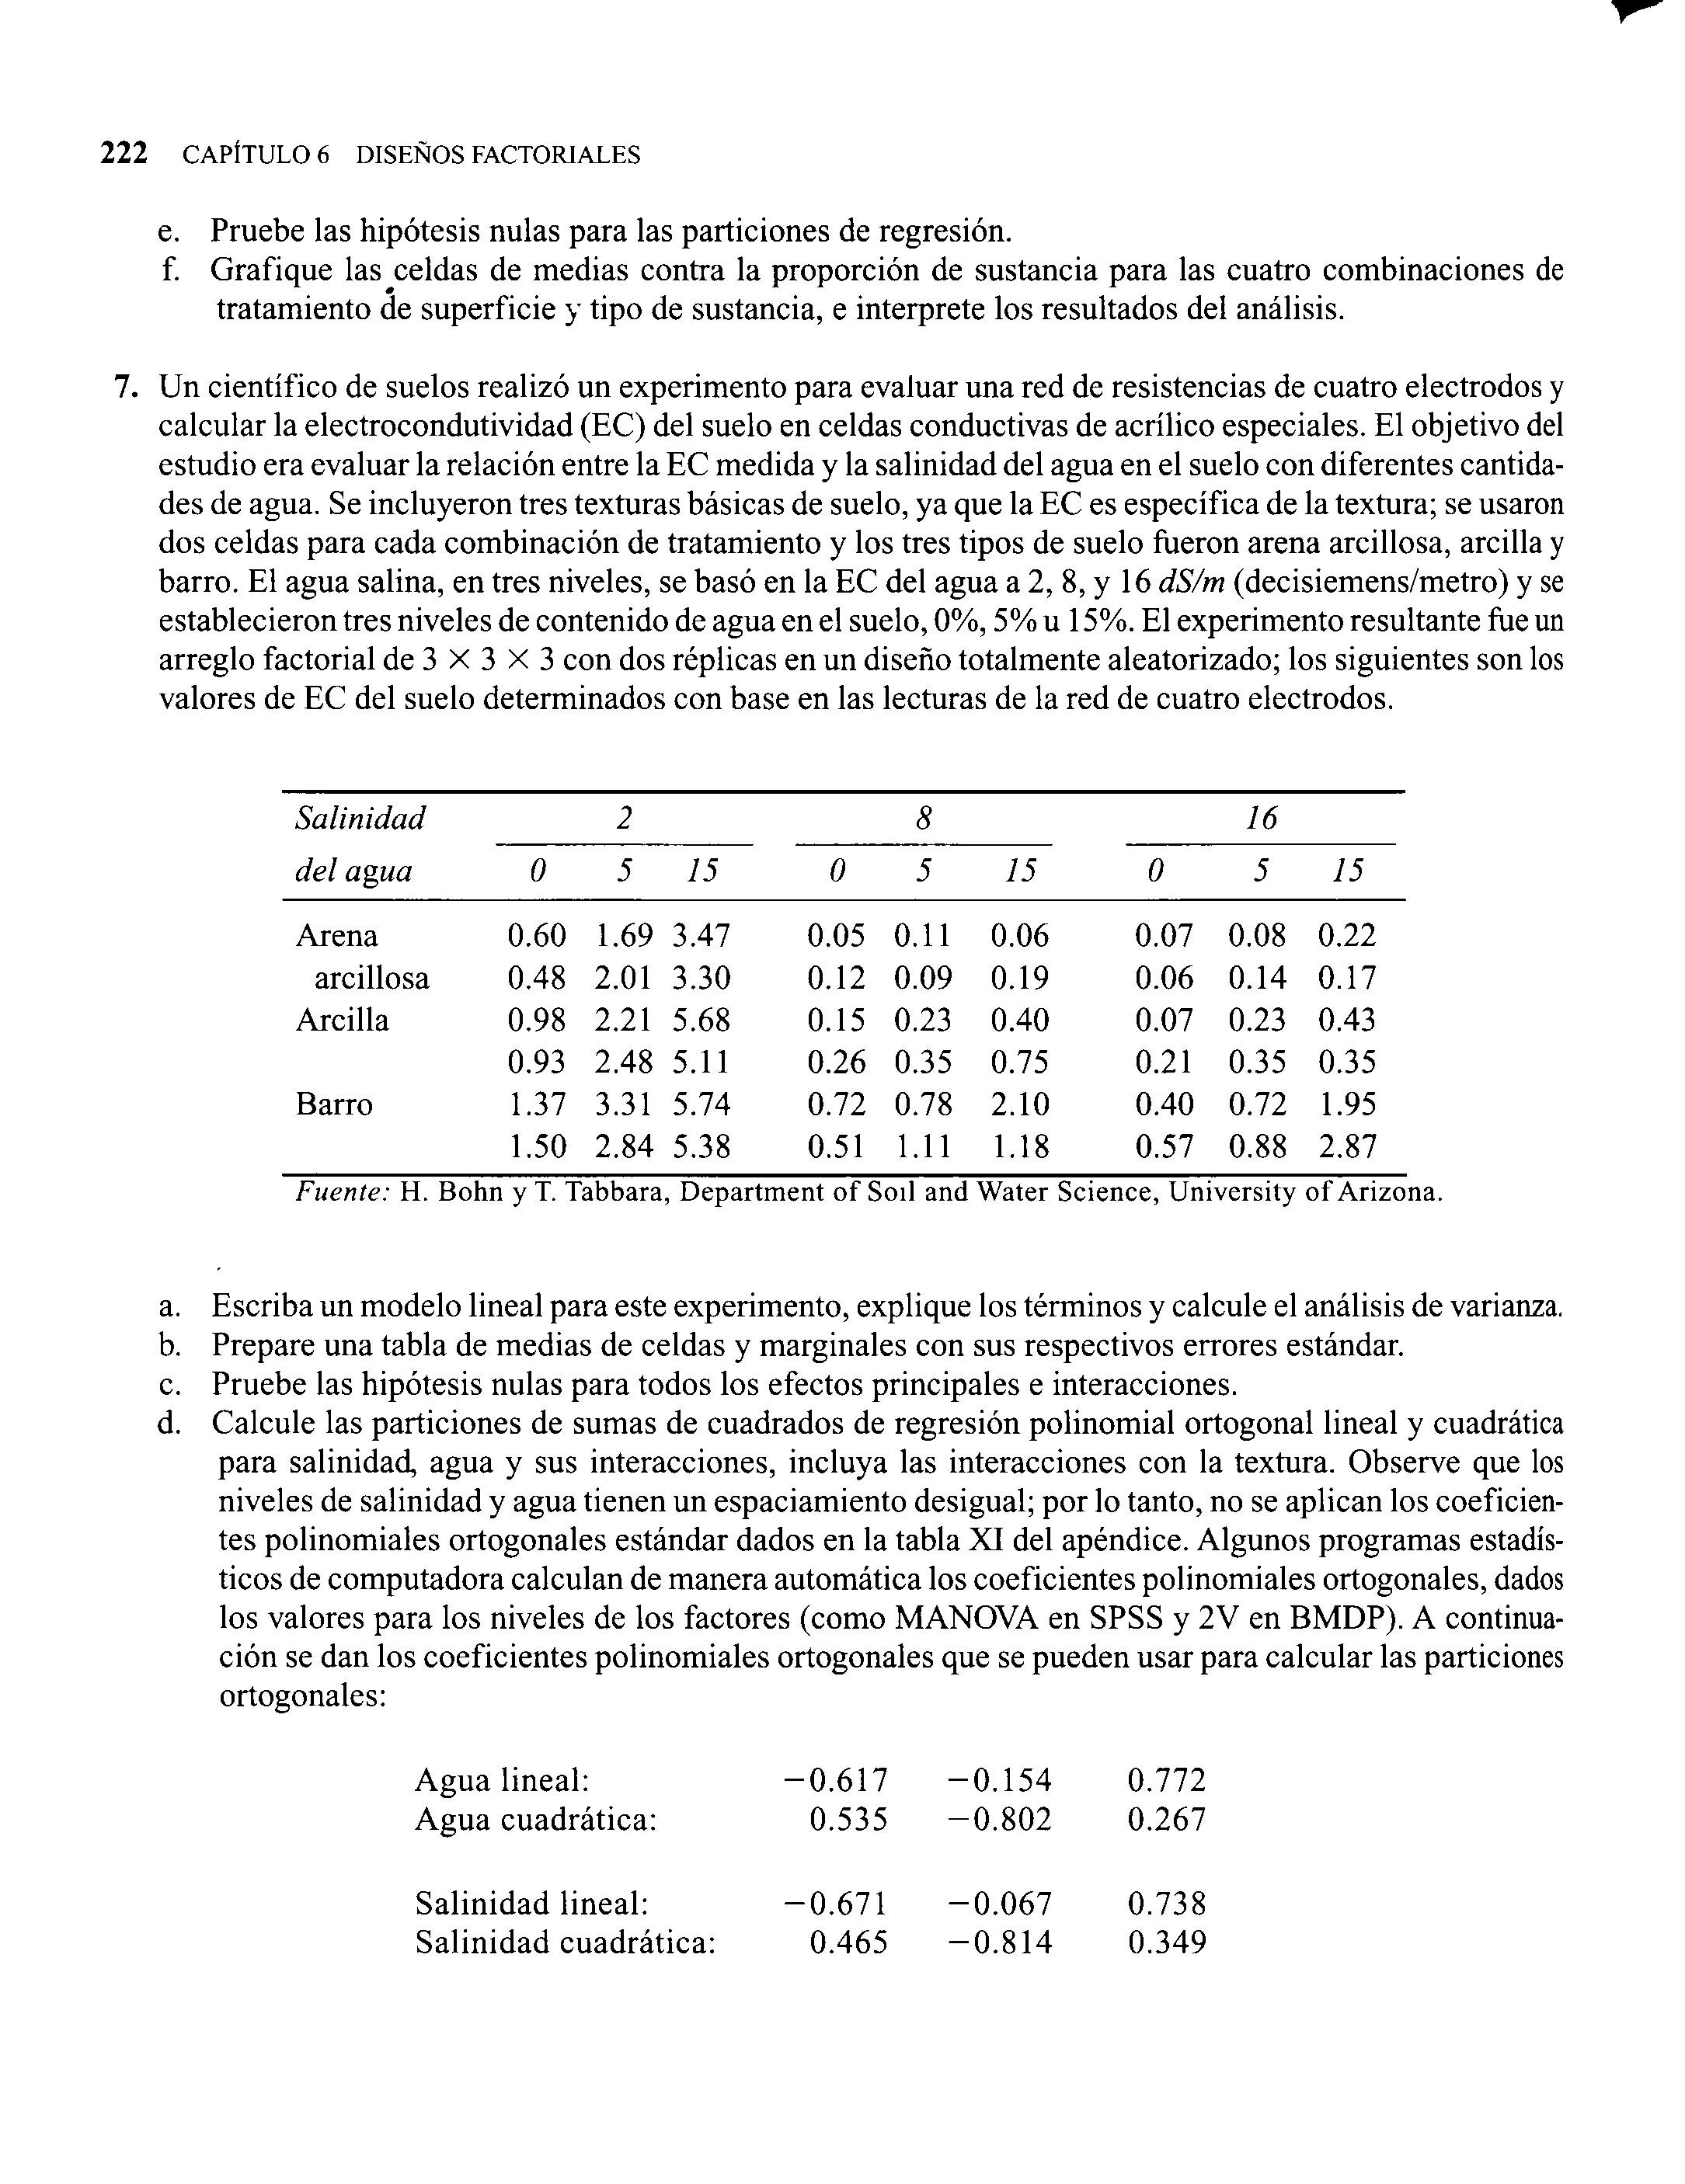

# **Parte I: Solución Usando - Python para el Diseño Factorial con Tres Factores y tres niveles $3^3$**
## **1. Nuestras librerias**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

## **2. Importando una base de datos a Python**

In [1]:
import pandas as pd

# Datos
# A = SUELOS
# B = EC_AGUA
# C = P_AGUA
# f = Electro_C

# Crear un diccionario con los datos
data = {
    'A': ['ARENA'] * 18 + ['ARCILLA'] * 18 + ['BARRO'] * 18,
    'B': ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6,
    'C': ['0', '0', '5', '5', '15', '15'] * 9,
    'f': [
        0.60, 0.48, 1.69, 2.01, 3.47, 3.30, 0.05, 0.12, 0.11, 0.09, 0.06, 0.19,
        0.07, 0.06, 0.08, 0.14, 0.22, 0.17, 0.98, 0.93, 2.21, 2.48, 5.68, 5.11,
        0.15, 0.26, 0.23, 0.35, 0.40, 0.75, 0.07, 0.21, 0.23, 0.35, 0.43, 0.35,
        1.37, 1.50, 3.31, 2.84, 5.74, 5.38, 0.72, 0.51, 0.78, 1.11, 2.10, 1.18,
        0.40, 0.57, 0.72, 0.88, 1.95, 2.87
    ]
}

# Crear el DataFrame
datos = pd.DataFrame(data)

# Mostrar el DataFrame
print(datos)


          A   B   C     f
0     ARENA   2   0  0.60
1     ARENA   2   0  0.48
2     ARENA   2   5  1.69
3     ARENA   2   5  2.01
4     ARENA   2  15  3.47
5     ARENA   2  15  3.30
6     ARENA   8   0  0.05
7     ARENA   8   0  0.12
8     ARENA   8   5  0.11
9     ARENA   8   5  0.09
10    ARENA   8  15  0.06
11    ARENA   8  15  0.19
12    ARENA  16   0  0.07
13    ARENA  16   0  0.06
14    ARENA  16   5  0.08
15    ARENA  16   5  0.14
16    ARENA  16  15  0.22
17    ARENA  16  15  0.17
18  ARCILLA   2   0  0.98
19  ARCILLA   2   0  0.93
20  ARCILLA   2   5  2.21
21  ARCILLA   2   5  2.48
22  ARCILLA   2  15  5.68
23  ARCILLA   2  15  5.11
24  ARCILLA   8   0  0.15
25  ARCILLA   8   0  0.26
26  ARCILLA   8   5  0.23
27  ARCILLA   8   5  0.35
28  ARCILLA   8  15  0.40
29  ARCILLA   8  15  0.75
30  ARCILLA  16   0  0.07
31  ARCILLA  16   0  0.21
32  ARCILLA  16   5  0.23
33  ARCILLA  16   5  0.35
34  ARCILLA  16  15  0.43
35  ARCILLA  16  15  0.35
36    BARRO   2   0  1.37
37    BARRO 

In [ ]:
datos.head()

,A,B,C,f
0,ARENA,2,0,0.60
1,ARENA,2,0,0.48
2,ARENA,2,5,1.69
3,ARENA,2,5,2.01
4,ARENA,2,15,3.47


In [ ]:
datos.columns

Index(['A', 'B', 'C', 'f'], dtype='object')

## **3. Diagrama de caja y Bigotes para cada factor**

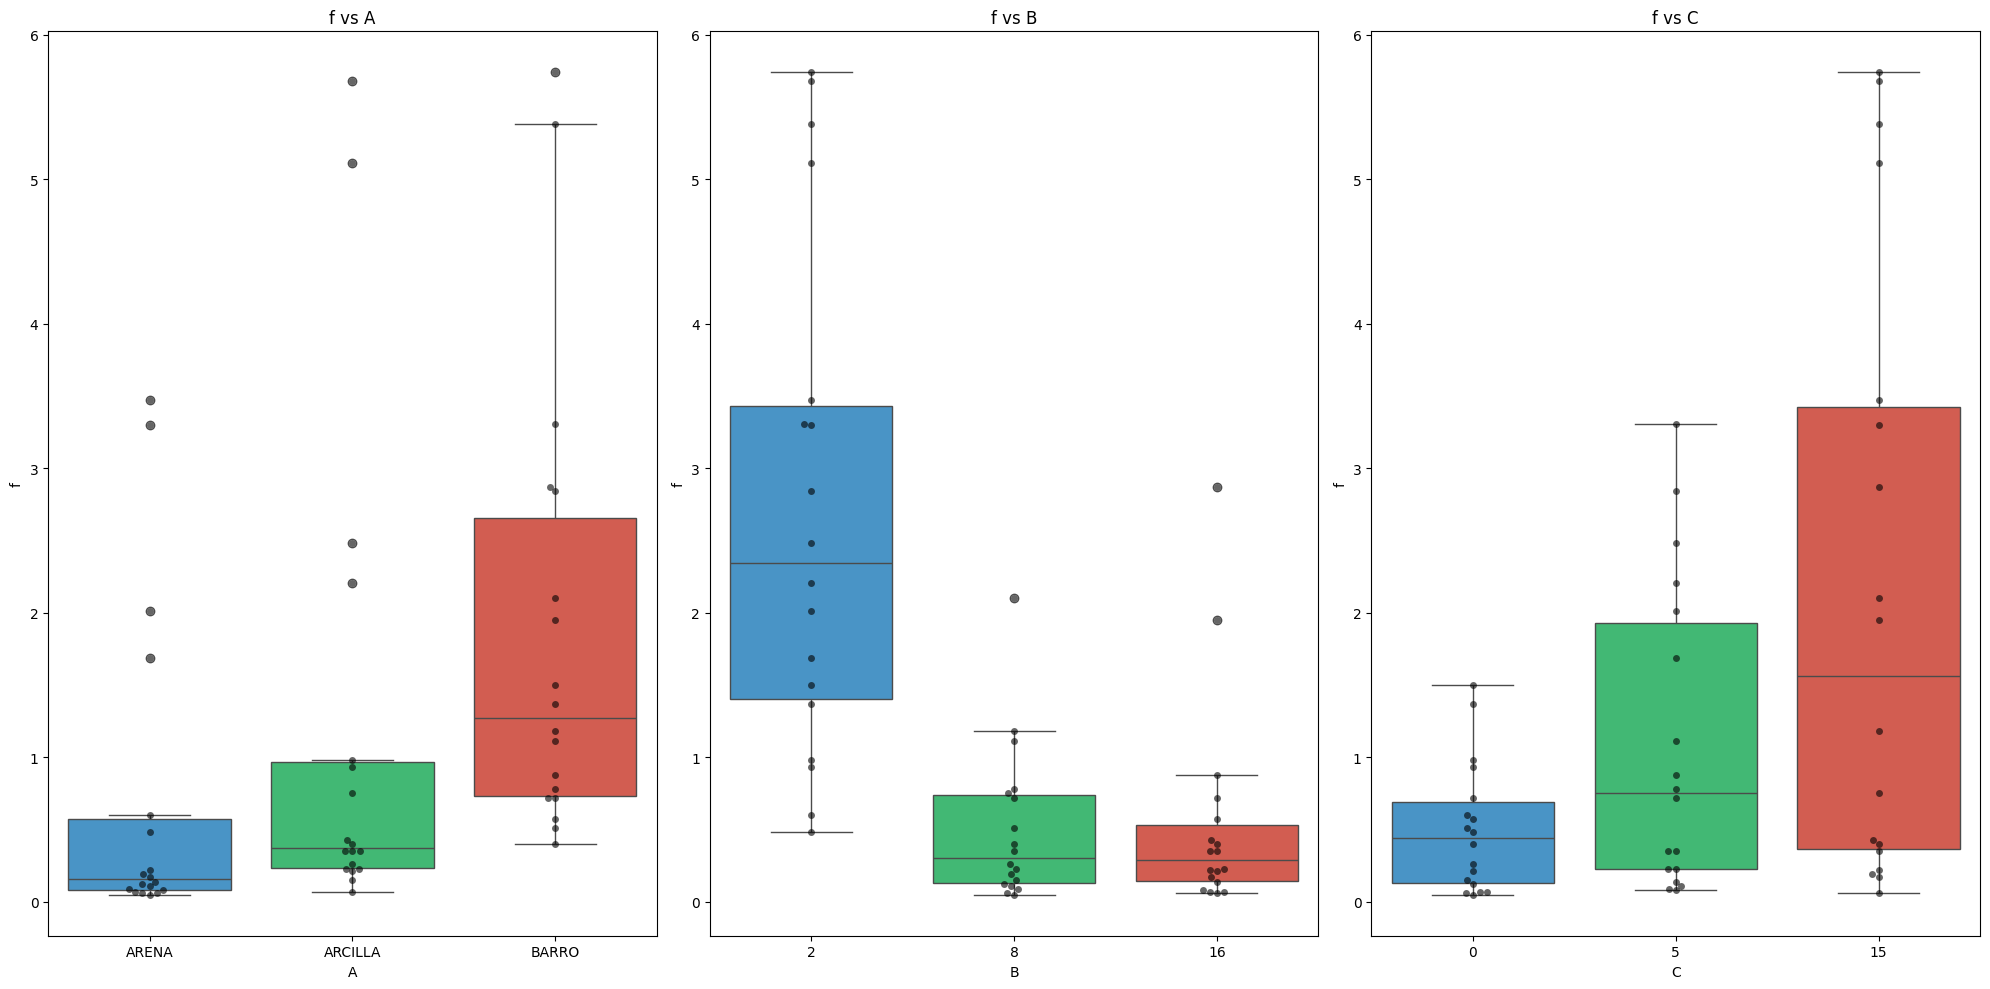

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definimos la paleta de colores
colors = ['#3498db', '#2ecc71', '#e74c3c']

# Creamos el gráfico
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Gráfico para f vs A
axs[0].set_title('f vs A')
sns.boxplot(x="A", y="f", data=datos, ax=axs[0], hue="A", palette=colors, legend=False)
sns.swarmplot(x="A", y="f", data=datos, color='black', alpha=0.6, ax=axs[0])

# Gráfico para f vs B
axs[1].set_title('f vs B')
sns.boxplot(x="B", y="f", data=datos, ax=axs[1], hue="B", palette=colors, legend=False)
sns.swarmplot(x="B", y="f", data=datos, color='black', alpha=0.6, ax=axs[1])

# Gráfico para f vs C
axs[2].set_title('f vs C')
sns.boxplot(x="C", y="f", data=datos, ax=axs[2], hue="C", palette=colors, legend=False)
sns.swarmplot(x="C", y="f", data=datos, color='black', alpha=0.6, ax=axs[2])

# Ajustamos el espacio entre gráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()


## **4. Diagrama de caja y Bigotes Bidimensional**

<Axes: title={'center': 'f vs B y C'}, xlabel='B', ylabel='f'>

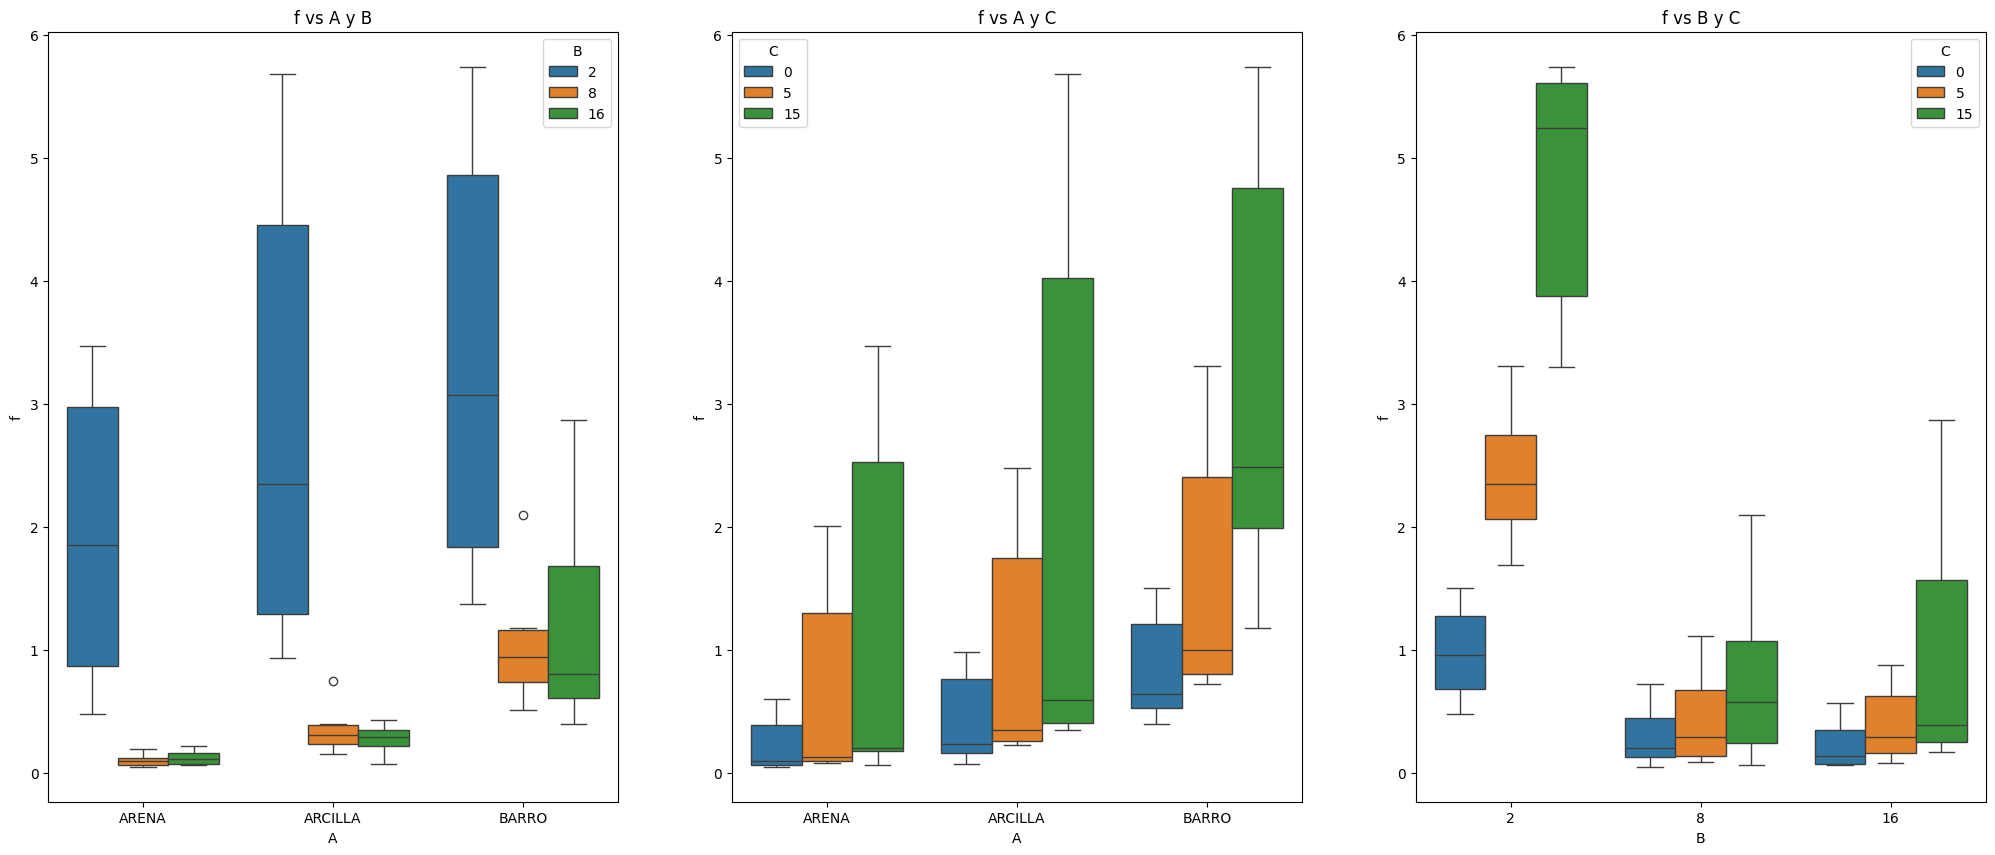

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
axs[0].set_title('f vs A y B')
sns.boxplot(x="A", y="f", hue = "B", data=datos, ax=axs[0]);
axs[1].set_title('f vs A y C')
sns.boxplot(x="A", y="f", hue = "C", data=datos, ax=axs[1])
axs[2].set_title('f vs B y C');
sns.boxplot(x="B", y="f", hue = "C", data=datos, ax=axs[2])

# **4. Descriptores Numéricos**

### **Para el Factor A**

In [4]:
print('f media y desviación típica para A')
datos.groupby('A')['f'].agg(['mean', 'std'])


f media y desviación típica para A


,mean,std
A,,
ARCILLA,1.176111,1.677811
ARENA,0.717222,1.120577
BARRO,1.885000,1.596339


In [5]:
import pandas as pd

# Calcular la media, la desviación estándar y el coeficiente de variación
fac_A = datos.groupby('A')['f'].agg(['mean', 'std'])
fac_A['cv_A'] = round((fac_A['std'] / fac_A['mean']) * 100,1)

fac_A


,mean,std,cv_A
A,,,
ARCILLA,1.176111,1.677811,142.7
ARENA,0.717222,1.120577,156.2
BARRO,1.885000,1.596339,84.7


### **Para el Factor B**

In [6]:
import pandas as pd

# Calcular la media, la desviación estándar y el coeficiente de variación
fac_B = datos.groupby('B')['f'].agg(['mean', 'std'])
fac_B['cv_B'] = round((fac_B['std'] / fac_B['mean']) * 100,1)

fac_B


,mean,std,cv_B
B,,,
16,0.542778,0.733956,135.2
2,2.726667,1.763479,64.7
8,0.508889,0.532739,104.7


### **Para el Factor C**

In [7]:
import pandas as pd

# Calcular la media, la desviación estándar y el coeficiente de variación
fac_C = datos.groupby('C')['f'].agg(['mean', 'std'])
fac_C['cv_C'] = round((fac_C['std'] / fac_C['mean']) * 100,1)

fac_C


,mean,std,cv_C
C,,,
0,0.502778,0.448551,89.2
15,2.186111,2.116638,96.8
5,1.089444,1.060485,97.3


# **5. Media, desviación estandard y coeficiente de variación para toda la base de datos**

In [8]:
print('f media y desviación típica para B')
fac_ABC = datos.groupby(['A', 'B', 'C'])['f'].agg(['mean', 'std'])
fac_ABC['coef_var'] = round((fac_ABC['std'] / fac_ABC['mean']) * 100,1)

fac_ABC

f media y desviación típica para B


mean       std  coef_var
A       B  C                            
ARCILLA 16 0   0.140  0.098995      70.7
           15  0.390  0.056569      14.5
           5   0.290  0.084853      29.3
        2  0   0.955  0.035355       3.7
           15  5.395  0.403051       7.5
           5   2.345  0.190919       8.1
        8  0   0.205  0.077782      37.9
           15  0.575  0.247487      43.0
           5   0.290  0.084853      29.3
ARENA   16 0   0.065  0.007071      10.9
           15  0.195  0.035355      18.1
           5   0.110  0.042426      38.6
        2  0   0.540  0.084853      15.7
           15  3.385  0.120208       3.6
           5   1.850  0.226274      12.2
        8  0   0.085  0.049497      58.2
           15  0.125  0.091924      73.5
           5   0.100  0.014142      14.1
BARRO   16 0   0.485  0.120208      24.8
           15  2.410  0.650538      27.0
           5   0.800  0.113137      14.1
        2  0   1.435  0.091924       6.4
           15  5.560  0.254558       4.6
           5   3.075  0.332340      10.8
        8  0   0.615  0.148492      24.1
           15  1.640  0.650538      39.7
           5   0.945  0.233345      24.7

# **6. Diagramas de interacción**

## **a. Interacción entre el SUELO (A) y EC_AGUA (B)**


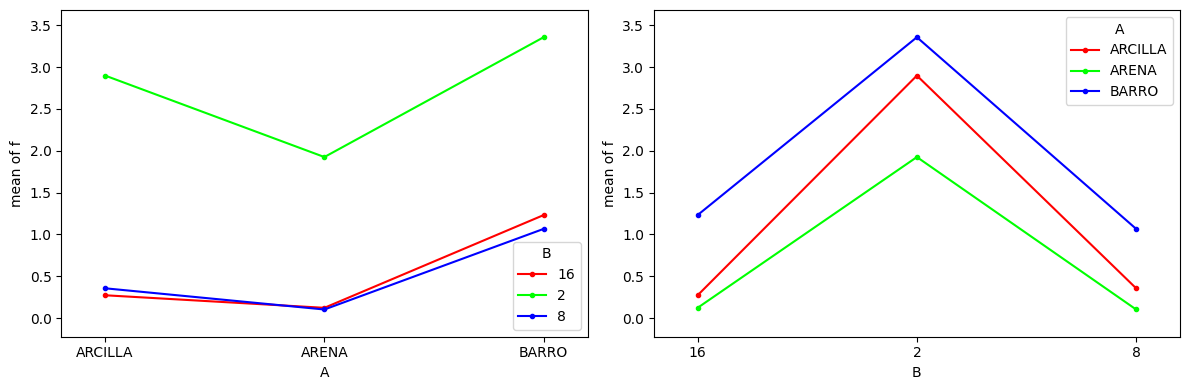

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Crear dos gráficos en una fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # ncols=2 para dos gráficos en una fila

# Primer gráfico
interaction_plot(
    x        = datos.A,
    trace    = datos.B,
    response = datos.f,
    ax       = axes[0],  # Primer eje
)

# Segundo gráfico
interaction_plot(
    x        = datos.B,
    trace    = datos.A,
    response = datos.f,
    ax       = axes[1],  # Segundo eje
)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


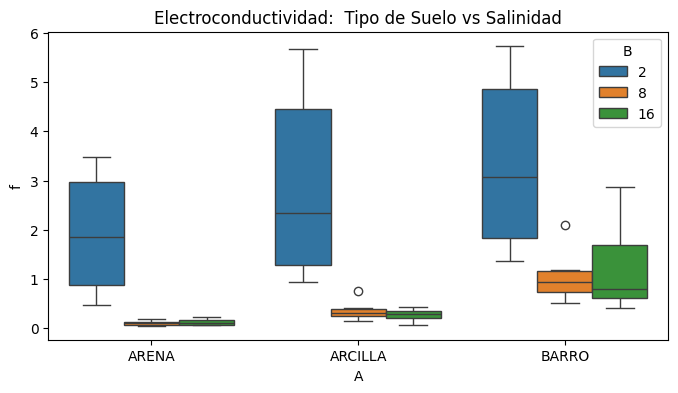

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Electroconductividad:  Tipo de Suelo vs Salinidad')
sns.boxplot(x="A", y="f", hue='B', data=datos, ax=ax);

## **b. Interacción entre el SUELO (A) y P_AGUA (C)**


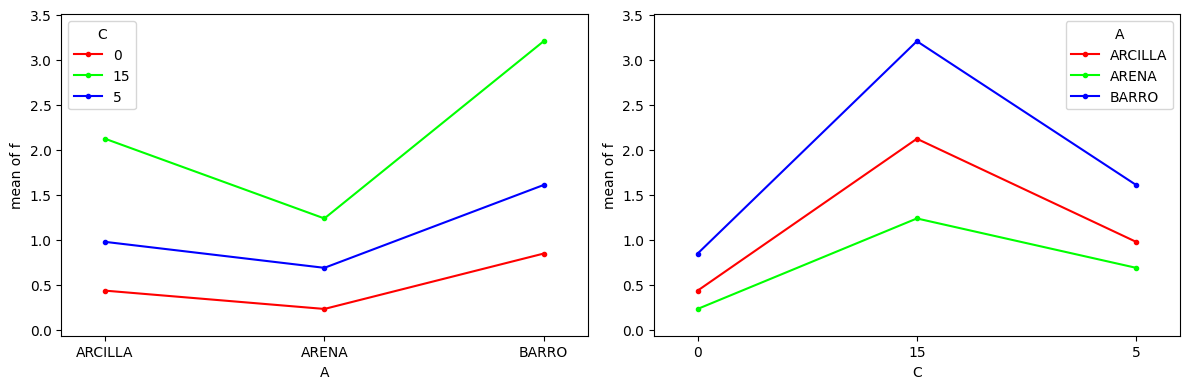

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Crear dos gráficos en una fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # ncols=2 para dos gráficos en una fila

# Primer gráfico
interaction_plot(
    x        = datos.A,
    trace    = datos.C,
    response = datos.f,
    ax       = axes[0],  # Primer eje
)

# Segundo gráfico
interaction_plot(
    x        = datos.C,
    trace    = datos.A,
    response = datos.f,
    ax       = axes[1],  # Segundo eje
)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


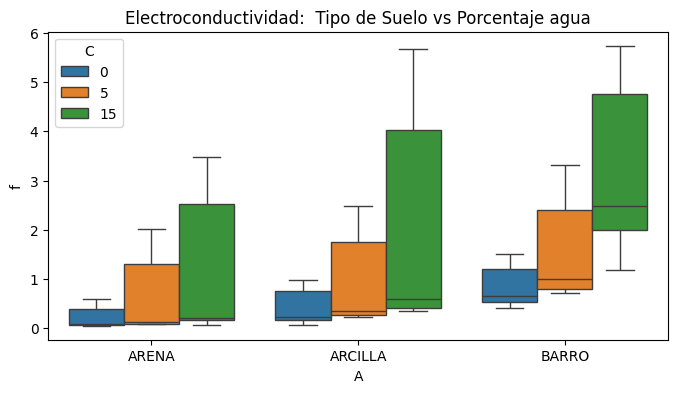

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Electroconductividad:  Tipo de Suelo vs Porcentaje agua')
sns.boxplot(x="A", y="f", hue='C', data=datos, ax=ax);

## **c. Interacción entre el EC_AGUA (B) y P_AGUA (C)**

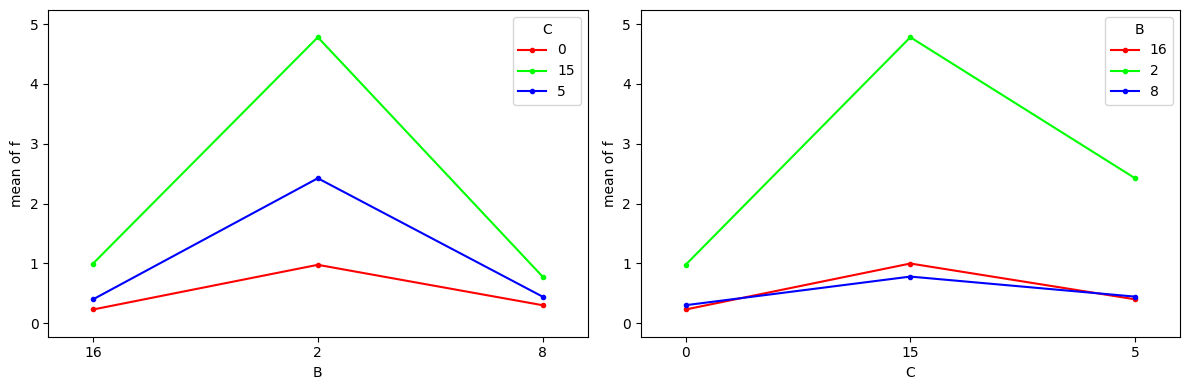

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Crear dos gráficos en una fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # ncols=2 para dos gráficos en una fila

# Primer gráfico
interaction_plot(
    x        = datos.B,
    trace    = datos.C,
    response = datos.f,
    ax       = axes[0],  # Primer eje
)

# Segundo gráfico
interaction_plot(
    x        = datos.C,
    trace    = datos.B,
    response = datos.f,
    ax       = axes[1],  # Segundo eje
)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


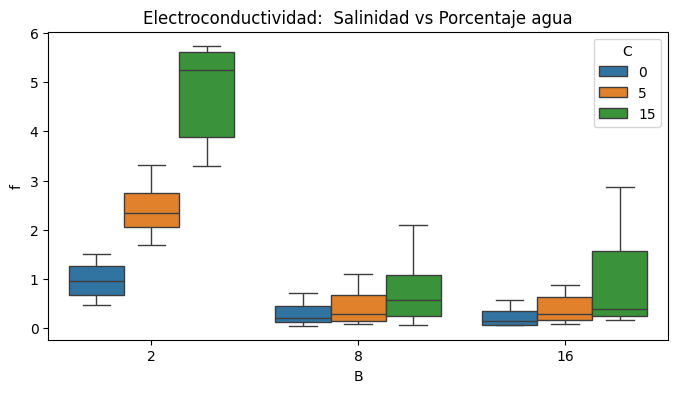

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Electroconductividad:  Salinidad vs Porcentaje agua')
sns.boxplot(x="B", y="f", hue='C', data=datos, ax=ax);

# **8. Anova usando StatModels**

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model2 = ols('f ~ A*B*C',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model2, typ=1)
print (anova_result)

            df     sum_sq    mean_sq           F        PR(>F)
A          2.0  12.460844   6.230422  110.982286  9.452657e-14
B          2.0  58.134344  29.067172  517.772489  2.935770e-22
C          2.0  26.282800  13.141400  234.087284  8.793735e-18
A:B        4.0   1.284578   0.321144    5.720534  1.811545e-03
A:C        4.0   3.036656   0.759164   13.522959  3.568131e-06
B:C        4.0  20.618956   5.154739   91.821178  2.586627e-15
A:B:C      8.0   1.650556   0.206319    3.675161  5.098099e-03
Residual  27.0   1.515750   0.056139         NaN           NaN


In [11]:
print(round(anova_result,3))

            df  sum_sq  mean_sq        F  PR(>F)
A          2.0  12.461    6.230  110.982   0.000
B          2.0  58.134   29.067  517.772   0.000
C          2.0  26.283   13.141  234.087   0.000
A:B        4.0   1.285    0.321    5.721   0.002
A:C        4.0   3.037    0.759   13.523   0.000
B:C        4.0  20.619    5.155   91.821   0.000
A:B:C      8.0   1.651    0.206    3.675   0.005
Residual  27.0   1.516    0.056      NaN     NaN


## **Seleccionando terminos del Anova**

In [12]:
anova_result.columns

Index(['df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)'], dtype='object')

In [13]:
fila_A = anova_result.loc['A']
print(fila_A)


df         2.000000e+00
sum_sq     1.246084e+01
mean_sq    6.230422e+00
F          1.109823e+02
PR(>F)     9.452657e-14
Name: A, dtype: float64


In [ ]:
F_B = anova_result.loc['B', 'F']
print(F_B)

517.7724888668973


In [ ]:
F_mayor_100 = anova_result[anova_result['F'] > 100]
print(F_mayor_100)


    df     sum_sq    mean_sq           F        PR(>F)
A  2.0  12.460844   6.230422  110.982286  9.452657e-14
B  2.0  58.134344  29.067172  517.772489  2.935770e-22
C  2.0  26.282800  13.141400  234.087284  8.793735e-18


In [ ]:
sum_sq_PR_ABC = anova_result.loc['A:B:C', ['sum_sq','mean_sq', 'PR(>F)']]
print(sum_sq_PR_ABC)


sum_sq     1.650556
mean_sq    0.206319
PR(>F)     0.005098
Name: A:B:C, dtype: float64


# **9. Método de comparaciones múltiples - LSD**

## **a. Método de comparaciones múltiples- LSD Fisher - Factor A**

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
# Realizar ANOVA usando el modelo lineal
model2 = ols('f ~ A*B*C', data=datos).fit()
anova_result = sm.stats.anova_lm(model2, typ=1)
print(round(anova_result,3))


            df  sum_sq  mean_sq        F  PR(>F)
A          2.0  12.461    6.230  110.982   0.000
B          2.0  58.134   29.067  517.772   0.000
C          2.0  26.283   13.141  234.087   0.000
A:B        4.0   1.285    0.321    5.721   0.002
A:C        4.0   3.037    0.759   13.523   0.000
B:C        4.0  20.619    5.155   91.821   0.000
A:B:C      8.0   1.651    0.206    3.675   0.005
Residual  27.0   1.516    0.056      NaN     NaN


In [16]:
# Obtener el MSE y los grados de libertad residuales
MSE = anova_result['mean_sq']['Residual']
df_residual = anova_result['df']['Residual']
print(f'El valor MSE = {round(MSE,4)} y los grados de libertad error es {df_residual}')

El valor MSE = 0.0561 y los grados de libertad error es 27.0


## **LSD para comparar las medias poblacionales de los diferentes niveles del Factor A**
$$LSD_{A}=t_{\alpha/2,abc(n-1)}\sqrt{CME(\frac{1}{n_{A_i}}+\frac{1}{n_{A_j}})}$$

$$LSD_{A}=t_{\alpha/2,df_{residual}}\sqrt{CME(\frac{2}{n})}$$

### **El intervalo de confianza para la media $μ_{A_i}$ del Factor A**

$$IC(μ_{A_i})=\bar{x}_{A_i} ± LSD_{A_i}=\bar{x}_{A_i} ±t_{\alpha/2,df_{residual}}\sqrt{CME(\frac{1}{n})}$$

## **LSD para comparar las medias poblacionales de los diferentes niveles de Factor B**
$$LSD_{B}=t_{\alpha/2,df_{residual}}\sqrt{CME(\frac{1}{n_{B_i}}+\frac{1}{n_{B_j}})}$$

## **LSD para comparar las medias poblacionales de los diferentes niveles de Factor C**
$$LSD_{C}=t_{\alpha/2,df_{residual}}\sqrt{CME(\frac{1}{n_{C_i}}+\frac{1}{n_{C_j}})}$$

### **c. LSD para el Factor A**

In [18]:
## **El número de observaciones por cada nivel de los difrentes factores es el mismo**
n = 18  # Tamaño de muestra por grupo (igual para todos los silos)

# Nivel de significancia
alpha = 0.05

# Calcular el valor t crítico
t_critical_A = t.ppf(1 - alpha/2, df_residual)

# Calcular LSD
lsd_A = t_critical_A * (2 * MSE / n) ** 0.5
print(f'El valor LSD para el factor A es {round(lsd_A,4)} y el valor critico es t_0.025_{df_residual} = {round(t_critical_A,2)}')


El valor LSD para el factor A es 0.1621 y el valor critico es t_0.025_27.0 = 2.05


In [21]:
t_critical_A2 = t.ppf(1 - alpha/2, df_residual)
std_err = (2*MSE / n) ** 0.5
t_critical_A2*std_err

0.16205115708954004

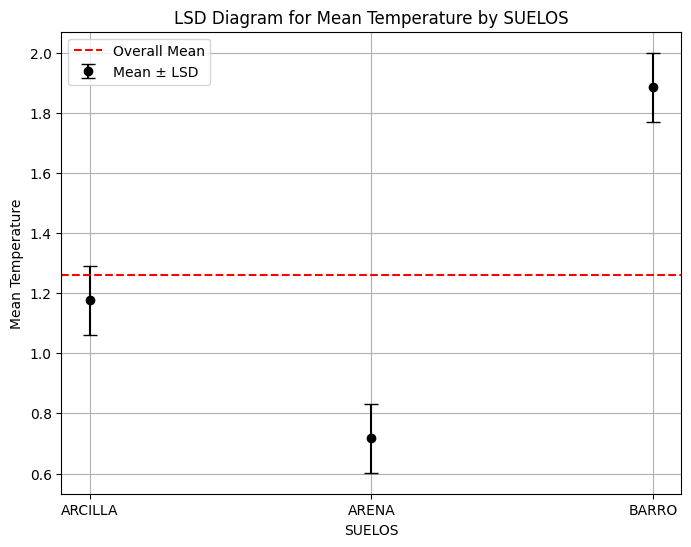

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Group means and standard error
group_means = datos.groupby('A')['f'].mean()
t_critical_A2 = t.ppf(1 - alpha / 2,  df_residual)
std_err = (MSE / n) ** 0.5
lsd2 = t_critical_A2 * std_err

# Plotting the LSD diagram
plt.figure(figsize=(8, 6))
plt.errorbar(group_means.index, group_means, yerr=lsd2, fmt='o', capsize=5, color='black', label='Mean ± LSD')
plt.axhline(y=group_means.mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('LSD Diagram for Mean Temperature by SUELOS')
plt.xlabel('SUELOS')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

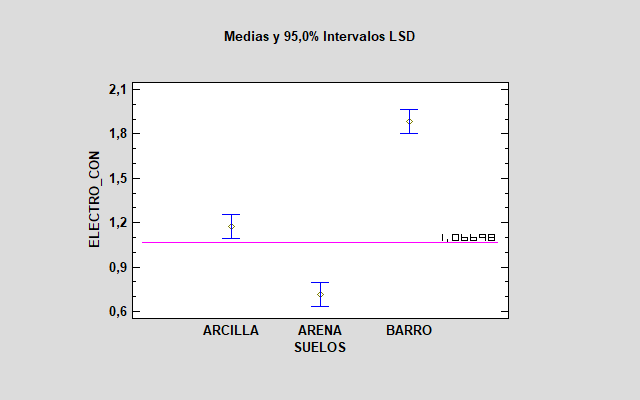

### **d. LSD para el Factor B**

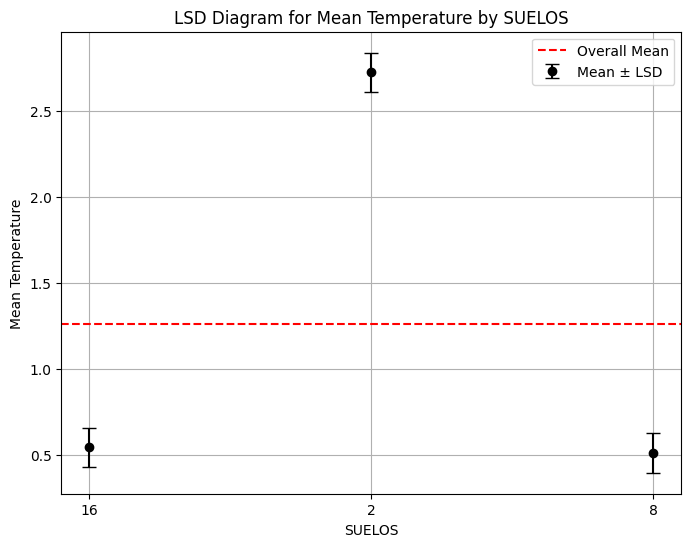

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Group means and standard error
n = 18
group_means = datos.groupby('B')['f'].mean()
t_critical_B = t.ppf(1 - alpha / 2,  df_residual)
std_err3 = (MSE / n) ** 0.5
lsd3 = t_critical_B * std_err3

# Plotting the LSD diagram
plt.figure(figsize=(8, 6))
plt.errorbar(group_means.index, group_means, yerr=lsd3, fmt='o', capsize=5, color='black', label='Mean ± LSD')
plt.axhline(y=group_means.mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('LSD Diagram for Mean Temperature by SUELOS')
plt.xlabel('SUELOS')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

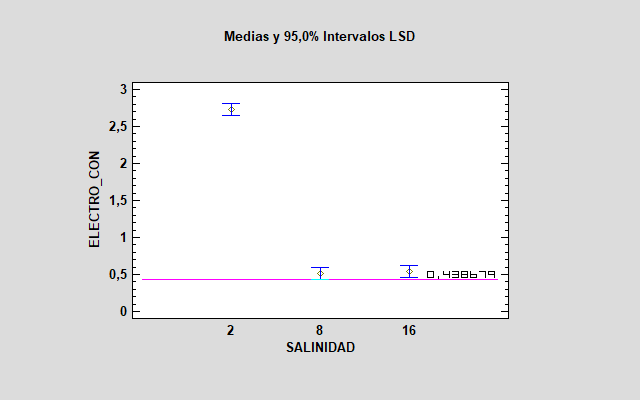

### **e. LSD para el Factor C**

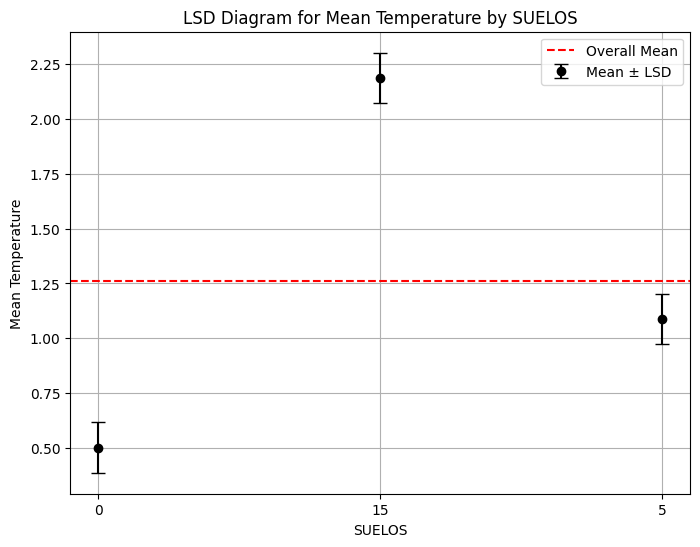

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Group means and standard error
n = 18
group_means = datos.groupby('C')['f'].mean()
t_critical_C = t.ppf(1 - alpha / 2,  df_residual)
std_err4 = (MSE / n) ** 0.5
lsd4 = t_critical_C * std_err4

# Plotting the LSD diagram
plt.figure(figsize=(8, 6))
plt.errorbar(group_means.index, group_means, yerr=lsd4, fmt='o', capsize=5, color='black', label='Mean ± LSD')
plt.axhline(y=group_means.mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('LSD Diagram for Mean Temperature by SUELOS')
plt.xlabel('SUELOS')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

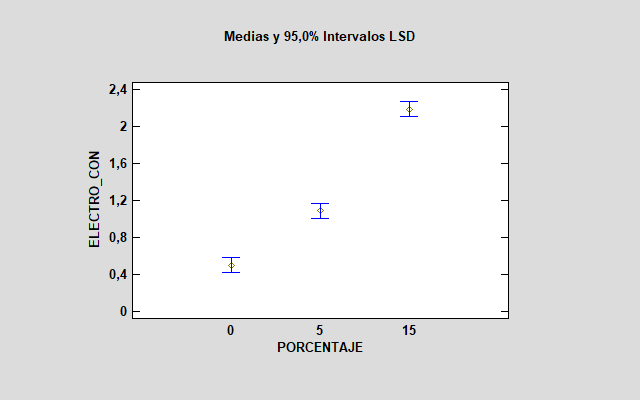

# **10. HSD Tukey**
## **HSD para comparar las medias poblacionales de los diferentes niveles del Factor A**
$$HSD_{A}=Q_{\alpha,k, df_{residual}}\sqrt{\frac{CME}{2}(\frac{1}{n_{A_i}}+\frac{1}{n_{A_j}})}$$

$$HSD_{A}=Q_{\alpha,k, df_{residual}}\sqrt{\frac{CME}{n}}$$

### **El intervalo de confianza para la media $μ_{A_i}$ del Factor A**

$$IC(μ_{A_i})=\bar{x}_{A_i} ± HSD_{A_i}=\bar{x}_{A_i} ±Q_{\alpha,k, df_{residual}}\sqrt{\frac{CME}{4n}}$$

## **LSD para comparar las medias poblacionales de los diferentes niveles de Factor B**
$$HSD_{B}=Q_{\alpha,k, df_{residual}}\sqrt{\frac{CME}{2}(\frac{1}{n_{B_i}}+\frac{1}{n_{B_j}})}$$

## **LSD para comparar las medias poblacionales de los diferentes niveles de Factor C**
$$HSD_{C}=Q_{\alpha,k, df_{residual}}\sqrt{\frac{CME}{2}(\frac{1}{n_{C_i}}+\frac{1}{n_{C_j}})}$$

In [79]:
## **h1 Valor critico de la tabla de rango Estudentizado**
num1 = anova_result.loc['A', 'df']
num2 = anova_result.loc['B', 'df']
num3 = anova_result.loc['C', 'df']
num4 = anova_result.loc['A:B', 'df']
num5 = anova_result.loc['A:C', 'df']
num6 = anova_result.loc['B:C', 'df']
num7 = anova_result.loc['A:B:C', 'df']
num8 = anova_result.loc['Residual', 'df']

n = 2

Q_Tukey = RST_Q[3-2][21-3]
print(f'El valor crítico de la tabla de Rango estudentizado es Q_Tukey = {Q_Tukey} con gl numerdor {num1+1} y gl denominador {num8}')

El valor crítico de la tabla de Rango estudentizado es Q_Tukey = 3.58 con gl numerdor 3.0 y gl denominador 27.0


In [81]:
## **El número de observaciones por cada nivel de los difrentes factores es el mismo**
N = 54
n = 18  # Tamaño de muestra por grupo (igual para todos los silos)
k = 3

# Nivel de significancia
alpha = 0.05

# Calcular el valor t crítico
Q_critical_A = RST_Q[num1-1][df_residual-3]
Q_critical_B = RST_Q[num2-1][df_residual-3]
Q_critical_C = RST_Q[num3-1][df_residual-3]

# Calcular LSD
HSD_A = Q_critical_A * (MSE /n) ** 0.5
HSD_B = Q_critical_B * (MSE /n) ** 0.5
HSD_C = Q_critical_C * (MSE /n) ** 0.5

print(f'El valor HSD para el factor A es {round(HSD_A,4)} y el valor critico es Q_hsd = {round(Q_critical_A,2)}')
print(f'El valor HSD para el factor B es {round(HSD_B,4)} y el valor critico es Q_hsd = {round(Q_critical_B,2)}')
print(f'El valor HSD para el factor C es {round(HSD_C,4)} y el valor critico es Q_hsd = {round(Q_critical_C,2)}')

El valor HSD para el factor A es 0.196 y el valor critico es Q_hsd = 3.51
El valor HSD para el factor B es 0.196 y el valor critico es Q_hsd = 3.51
El valor HSD para el factor C es 0.196 y el valor critico es Q_hsd = 3.51


**HSD para SUELOS**

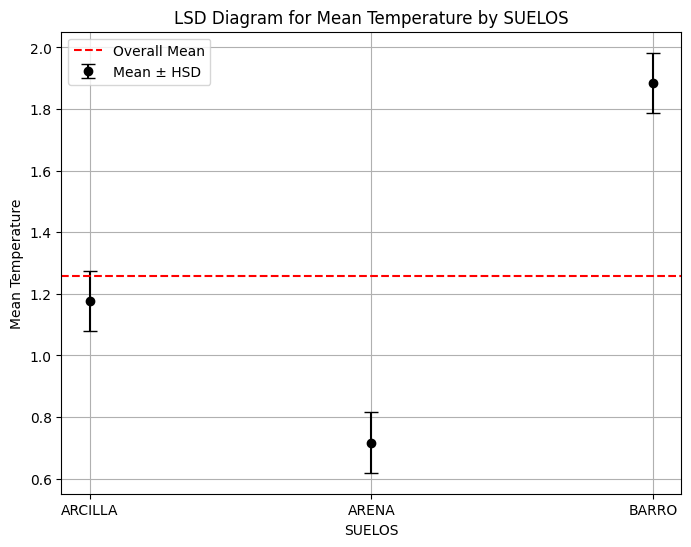

In [83]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Group means and standard error
n = 18
group_means = datos.groupby('A')['f'].mean()
HSD_A2 = Q_critical_A * (MSE /(4*n)) ** 0.5

# Plotting the LSD diagram
plt.figure(figsize=(8, 6))
plt.errorbar(group_means.index, group_means, yerr=HSD_A2, fmt='o', capsize=5, color='black', label='Mean ± HSD')
plt.axhline(y=group_means.mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('HSD Diagram for Mean Temperature by SUELOS')
plt.xlabel('SUELOS')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

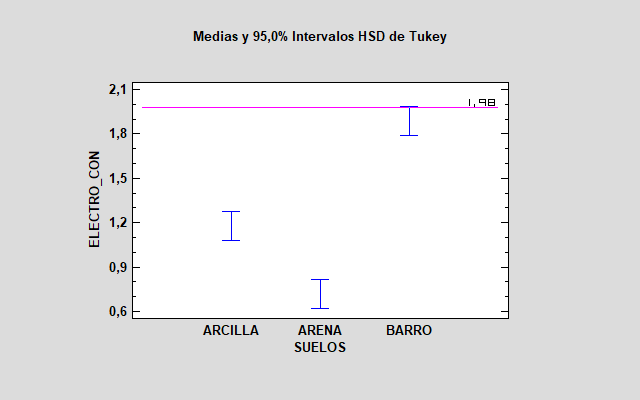

**Para Salinidad**

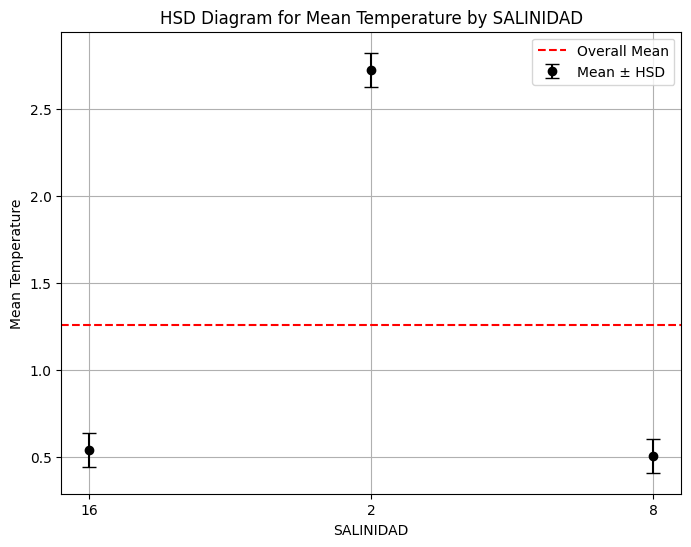

In [85]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Group means and standard error
n = 18
group_means = datos.groupby('B')['f'].mean()
HSD_B2 = Q_critical_B * (MSE /(4*n)) ** 0.5

# Plotting the LSD diagram
plt.figure(figsize=(8, 6))
plt.errorbar(group_means.index, group_means, yerr=HSD_B2, fmt='o', capsize=5, color='black', label='Mean ± HSD')
plt.axhline(y=group_means.mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('HSD Diagram for Mean Temperature by SALINIDAD')
plt.xlabel('SALINIDAD')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

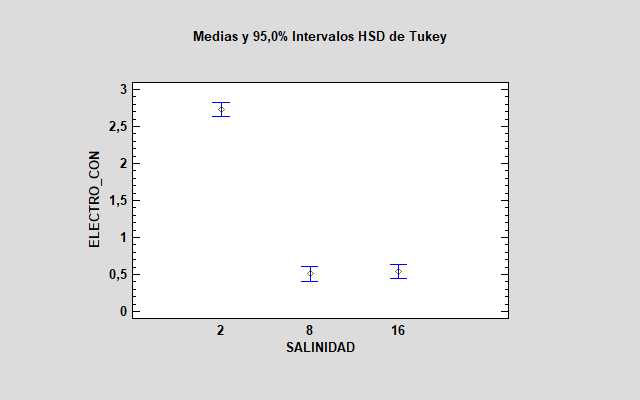

**Para PORCENTAJE DE AGUA**

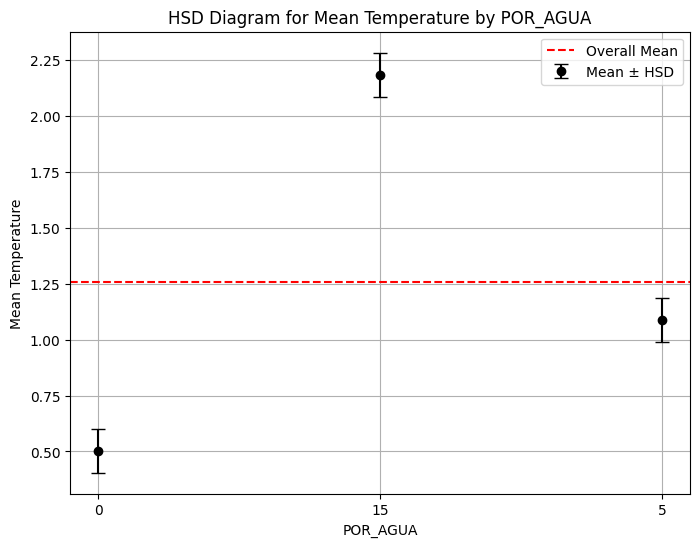

In [86]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Group means and standard error
n = 18
group_means = datos.groupby('C')['f'].mean()
HSD_C2 = Q_critical_C * (MSE /(4*n)) ** 0.5

# Plotting the LSD diagram
plt.figure(figsize=(8, 6))
plt.errorbar(group_means.index, group_means, yerr=HSD_C2, fmt='o', capsize=5, color='black', label='Mean ± HSD')
plt.axhline(y=group_means.mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('HSD Diagram for Mean Temperature by POR_AGUA')
plt.xlabel('POR_AGUA')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

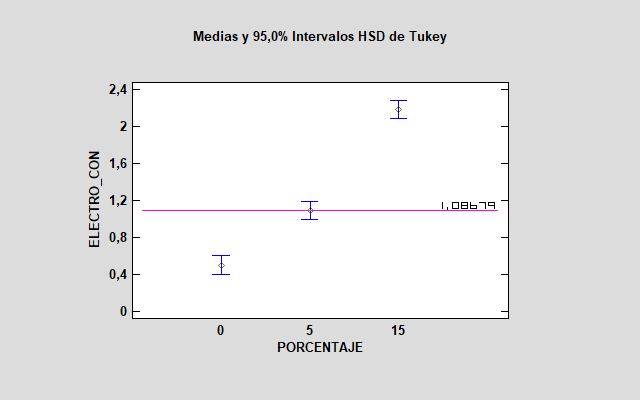

# **Usando R desde Colab**

## **1. Acomodamos a Colab para recibir a R**

In [1]:
%load_ext rpy2.ipython

## **2. Eliminamos losmensajes cuando instalemos un programa de R en Colab**

In [2]:
import logging
logging.getLogger('rpy2').setLevel(logging.ERROR)

## **3. Instalamos nuestros paquetes de uso en R**

In [3]:
%%R
install.packages("gridExtra")
install.packages("ggplot2")
library(gridExtra)
library(ggplot2)

## **4. Nuestro dataframe en R**

In [4]:
%%R
Electro_C = c(0.60,0.48,1.69,2.01,3.47,3.30,0.05,0.12,0.11,0.09,0.06,0.19,
0.07,0.06,0.08,0.14,0.22, 0.17,0.98,0.93,2.21,2.48,5.68,5.11,0.15,0.26,
0.23,0.35,0.40,0.75,0.07,0.21,0.23,0.35,0.43,0.35,1.37,1.50,3.31,2.84,5.74,
5.38,0.72,0.51,0.78,1.11,2.10,1.18,0.40,0.57,0.72,0.88,1.95,2.87)
SUELOS =factor( c(rep("ARENA",18),
                rep("ARCILLA",18),
                rep("BARRO",18)))
EC_AGUA = factor(c(rep("2",6),
                    rep("8",6),
                    rep("16",6)))
P_AGUA = factor(c(rep("0",2),
                    rep("5",2),
                    rep("15",2)))


In [5]:
%%R
Electro_C = c(0.60,0.48,1.69,2.01,3.47,3.30,0.05,0.12,0.11,0.09,0.06,0.19,
0.07,0.06,0.08,0.14,0.22, 0.17,0.98,0.93,2.21,2.48,5.68,5.11,0.15,0.26,
0.23,0.35,0.40,0.75,0.07,0.21,0.23,0.35,0.43,0.35,1.37,1.50,3.31,2.84,5.74,
5.38,0.72,0.51,0.78,1.11,2.10,1.18,0.40,0.57,0.72,0.88,1.95,2.87)
SUELOS =factor( c(rep("ARENA",18),
                rep("ARCILLA",18),
                rep("BARRO",18)))
EC_AGUA = factor(c(rep("2",6),
                    rep("8",6),
                    rep("16",6)))
P_AGUA = factor(c(rep("0",2),
                    rep("5",2),
                    rep("15",2)))

D3F = data.frame(SUELOS,EC_AGUA, P_AGUA,Electro_C)
D3F

    SUELOS EC_AGUA P_AGUA Electro_C
1    ARENA       2      0      0.60
2    ARENA       2      0      0.48
3    ARENA       2      5      1.69
4    ARENA       2      5      2.01
5    ARENA       2     15      3.47
6    ARENA       2     15      3.30
7    ARENA       8      0      0.05
8    ARENA       8      0      0.12
9    ARENA       8      5      0.11
10   ARENA       8      5      0.09
11   ARENA       8     15      0.06
12   ARENA       8     15      0.19
13   ARENA      16      0      0.07
14   ARENA      16      0      0.06
15   ARENA      16      5      0.08
16   ARENA      16      5      0.14
17   ARENA      16     15      0.22
18   ARENA      16     15      0.17
19 ARCILLA       2      0      0.98
20 ARCILLA       2      0      0.93
21 ARCILLA       2      5      2.21
22 ARCILLA       2      5      2.48
23 ARCILLA       2     15      5.68
24 ARCILLA       2     15      5.11
25 ARCILLA       8      0      0.15
26 ARCILLA       8      0      0.26
27 ARCILLA       8      5   

## **5. Conociendo nuestros datos**

In [6]:
%%R
summary(D3F)

     SUELOS   EC_AGUA P_AGUA    Electro_C     
 ARCILLA:18   16:18   0 :18   Min.   :0.0500  
 ARENA  :18   2 :18   15:18   1st Qu.:0.2125  
 BARRO  :18   8 :18   5 :18   Median :0.5850  
                              Mean   :1.2594  
                              3rd Qu.:1.8850  
                              Max.   :5.7400  


In [9]:
%%R
table_SUELOS<-table(D3F$SUELOS)
table_SUELOS


ARCILLA   ARENA   BARRO 
     18      18      18 


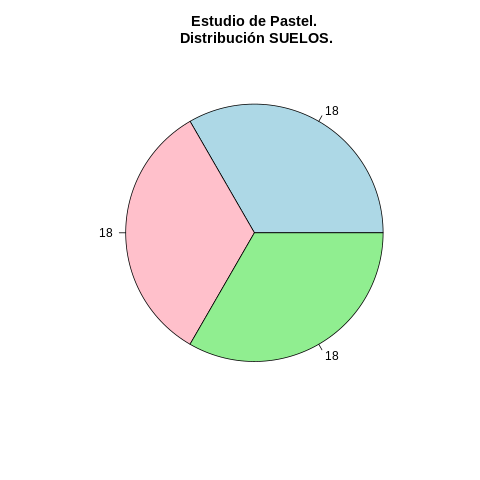

In [12]:
%%R
pie_1<-pie(table_SUELOS, col=c("lightblue","pink","lightgreen"),
        main="Estudio de Pastel.\n Distribución SUELOS.", labels = table_SUELOS)

In [16]:
%%R
table_SUELOS2<-round(table(D3F$SUELOS)/length(D3F$SUELOS)*100,1)
table_SUELOS2


ARCILLA   ARENA   BARRO 
   33.3    33.3    33.3 


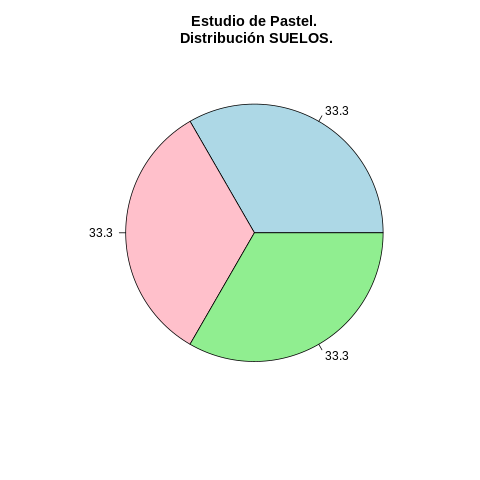

In [17]:
%%R
pie_1<-pie(table_SUELOS2, col=c("lightblue","pink","lightgreen"),
        main="Estudio de Pastel.\n Distribución SUELOS.", labels = table_SUELOS2)

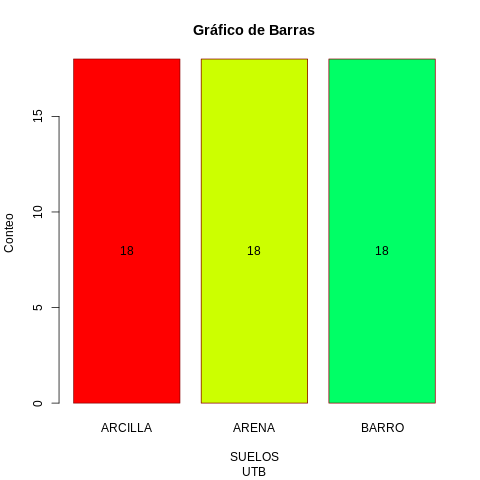

In [23]:
%%R
barp<-barplot(table_SUELOS, col = rainbow(5), border = "darkred", main = "Gráfico de Barras", sub = "UTB", xlab = "SUELOS", ylab = "Conteo")
text(barp, table_SUELOS-10, labels = table_SUELOS)

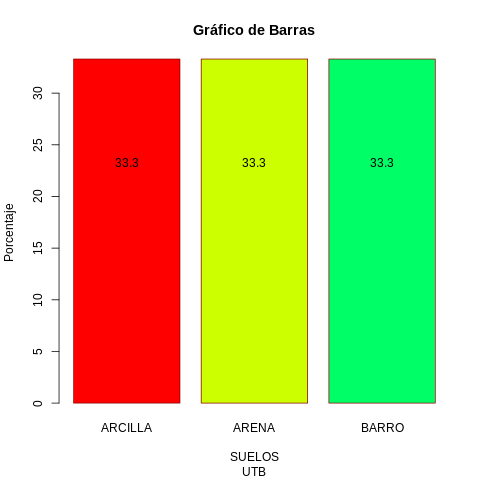

In [25]:
%%R
barp2<-barplot(table_SUELOS2, col = rainbow(5), border = "darkred",main = "Gráfico de Barras",sub = "UTB",xlab = "SUELOS", ylab = "Porcentaje")
text(barp2, table_SUELOS2-10, labels = table_SUELOS2)

In [26]:
%%R
table_3<-table(D3F$SUELOS, D3F$EC_AGUA)
table_3

         
          16 2 8
  ARCILLA  6 6 6
  ARENA    6 6 6
  BARRO    6 6 6


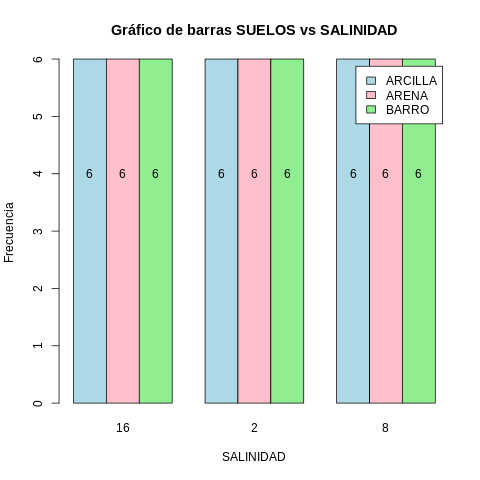

In [31]:
%%R
barp3<-barplot(table_3,
        main = "Gráfico de barras SUELOS vs SALINIDAD",
        xlab = "SALINIDAD", ylab = "Frecuencia",
        col = c("lightblue","pink","lightgreen"),
        legend.text = rownames(table_3),
        beside = TRUE) # Barras agrupadas
text(barp3, table_3-2, labels = table_3)

## **6. Nuestro boxplot para los facores principales**

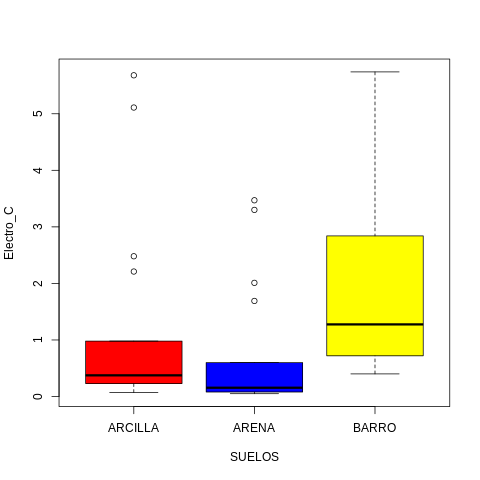

In [32]:
%%R
plot(Electro_C ~ SUELOS, data=D3F, col=c("red", "blue", "yellow"))

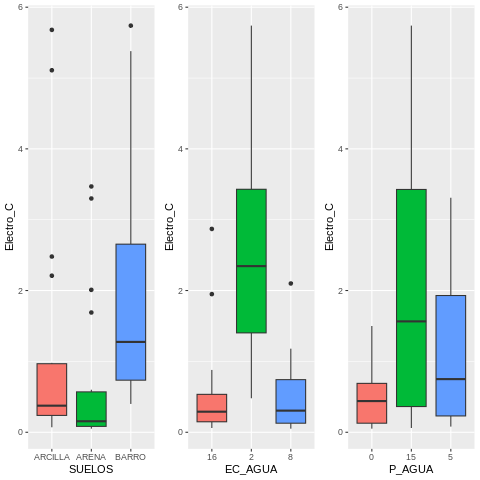

In [33]:
%%R
SUELOS2 <- ggplot(D3F, aes(x = SUELOS, y = Electro_C, fill=SUELOS)) +
  geom_boxplot() + theme(legend.position = "none")
EC_AGUA2 <- ggplot(D3F, aes(x = EC_AGUA, y = Electro_C, fill=EC_AGUA)) +
  geom_boxplot() + theme(legend.position = "none")
P_AGUA2 <- ggplot(D3F, aes(x = P_AGUA, y = Electro_C, fill=P_AGUA)) +
  geom_boxplot() + theme(legend.position = "none")
grid.arrange(SUELOS2,EC_AGUA2,P_AGUA2, nrow=1, ncol=3)

## **7. Análisis de Varianza**

### **a. Definimos el Modelo Lineal**

In [35]:
%%R
modeloD3F= lm(Electro_C ~ SUELOS*EC_AGUA*P_AGUA, D3F)
modeloD3F



Call:
lm(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

Coefficients:
                  (Intercept)                    SUELOSARENA  
                        0.140                         -0.075  
                  SUELOSBARRO                       EC_AGUA2  
                        0.345                          0.815  
                     EC_AGUA8                       P_AGUA15  
                        0.065                          0.250  
                      P_AGUA5           SUELOSARENA:EC_AGUA2  
                        0.150                         -0.340  
         SUELOSBARRO:EC_AGUA2           SUELOSARENA:EC_AGUA8  
                        0.135                         -0.045  
         SUELOSBARRO:EC_AGUA8           SUELOSARENA:P_AGUA15  
                        0.065                         -0.120  
         SUELOSBARRO:P_AGUA15            SUELOSARENA:P_AGUA5  
                        1.675                         -0.105  
          SUELOSBARRO:P_AGUA5   

### **b. Resumen del Modelo Lineal**

In [36]:
%%R
summary(modeloD3F)



Call:
lm(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46000 -0.06875  0.00000  0.06875  0.46000 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.1400     0.1675   0.836 0.410700    
SUELOSARENA                    -0.0750     0.2369  -0.317 0.754027    
SUELOSBARRO                     0.3450     0.2369   1.456 0.156900    
EC_AGUA2                        0.8150     0.2369   3.440 0.001907 ** 
EC_AGUA8                        0.0650     0.2369   0.274 0.785915    
P_AGUA15                        0.2500     0.2369   1.055 0.300714    
P_AGUA5                         0.1500     0.2369   0.633 0.532007    
SUELOSARENA:EC_AGUA2           -0.3400     0.3351  -1.015 0.319262    
SUELOSBARRO:EC_AGUA2            0.1350     0.3351   0.403 0.690201    
SUELOSARENA:EC_AGUA8           -0.0450     0.3351  -0.134 0.894164    
SUELOSBARRO:EC_AGUA8         

### **c. El Anova del Modelo**

In [37]:
%%R
anova(modeloD3F)


Analysis of Variance Table

Response: Electro_C
                      Df Sum Sq Mean Sq  F value    Pr(>F)    
SUELOS                 2 12.461  6.2304 110.9823 9.453e-14 ***
EC_AGUA                2 58.134 29.0672 517.7725 < 2.2e-16 ***
P_AGUA                 2 26.283 13.1414 234.0873 < 2.2e-16 ***
SUELOS:EC_AGUA         4  1.285  0.3211   5.7205  0.001812 ** 
SUELOS:P_AGUA          4  3.037  0.7592  13.5230 3.568e-06 ***
EC_AGUA:P_AGUA         4 20.619  5.1547  91.8212 2.587e-15 ***
SUELOS:EC_AGUA:P_AGUA  8  1.651  0.2063   3.6752  0.005098 ** 
Residuals             27  1.516  0.0561                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### **d. Variables que contiene nuestro modelo: usando names(g)**

In [38]:
### **d. Variables que contiene nuestro modelo: usando names(g)**
%%R
names(modeloD3F)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        


# **8. Supuesto del Modelo**
## **(a) Examinando la normalidad de los datos: Gráfico QQ**

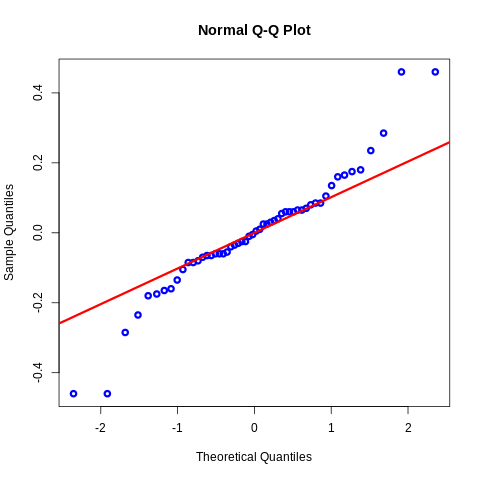

In [39]:
%%R
qqnorm(modeloD3F$residuals,col="blue", lwd=3)
qqline(modeloD3F$residuals,col="red", lwd=3)

## **(b) Examinando la Homocedasticidad de los datos: Residuos vs Predichos**

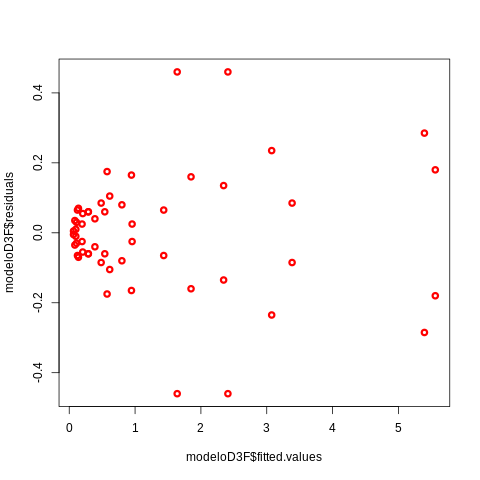

In [40]:
%%R
plot(modeloD3F$fitted.values,modeloD3F$residuals,col="red", lwd=3)

In [ ]:
%%R
g = modeloD3F
plot(jitter(g$fit),g$res,xlab="Predichos",ylab="Residuos",
main="Jittered plot", col="blue", lwd=3)

# **8. Comparaciones Múltiples - D3F**

In [41]:
%%R
g = modeloD3F
summary(g)


Call:
lm(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46000 -0.06875  0.00000  0.06875  0.46000 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.1400     0.1675   0.836 0.410700    
SUELOSARENA                    -0.0750     0.2369  -0.317 0.754027    
SUELOSBARRO                     0.3450     0.2369   1.456 0.156900    
EC_AGUA2                        0.8150     0.2369   3.440 0.001907 ** 
EC_AGUA8                        0.0650     0.2369   0.274 0.785915    
P_AGUA15                        0.2500     0.2369   1.055 0.300714    
P_AGUA5                         0.1500     0.2369   0.633 0.532007    
SUELOSARENA:EC_AGUA2           -0.3400     0.3351  -1.015 0.319262    
SUELOSBARRO:EC_AGUA2            0.1350     0.3351   0.403 0.690201    
SUELOSARENA:EC_AGUA8           -0.0450     0.3351  -0.134 0.894164    
SUELOSBARRO:EC_AGUA8         

## **Tukey: Rangos múltiples**

In [42]:
%%R
h = aov( Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)
TukeyHSD(h)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

$SUELOS
                    diff        lwr        upr    p adj
ARENA-ARCILLA -0.4588889 -0.6547104 -0.2630674 1.02e-05
BARRO-ARCILLA  0.7088889  0.5130674  0.9047104 0.00e+00
BARRO-ARENA    1.1677778  0.9719563  1.3635993 0.00e+00

$EC_AGUA
            diff        lwr        upr    p adj
2-16  2.18388889  1.9880674  2.3797104 0.000000
8-16 -0.03388889 -0.2297104  0.1619326 0.903854
8-2  -2.21777778 -2.4135993 -2.0219563 0.000000

$P_AGUA
           diff        lwr        upr p adj
15-0  1.6833333  1.4875118  1.8791548 0e+00
5-0   0.5866667  0.3908452  0.7824882 2e-07
5-15 -1.0966667 -1.2924882 -0.9008452 0e+00

$`SUELOS:EC_AGUA`
                            diff          lwr        upr     p adj
ARENA:16-ARCILLA:16  -0.15000000 -0.610274865  0.3102749 0.9698033
BARRO:16-ARCILLA:16   0.95833333  0.498058468  1.4186082 0.0000051
ARCILLA:2-ARCI

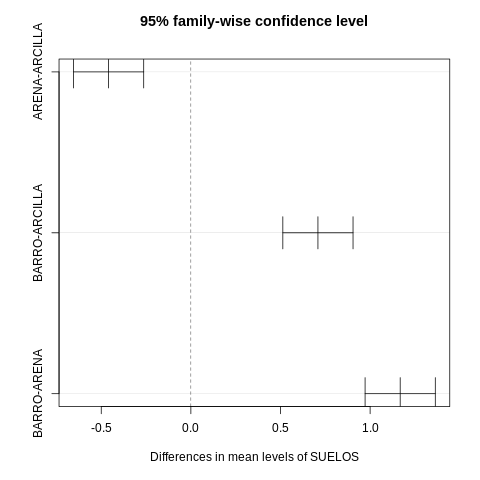

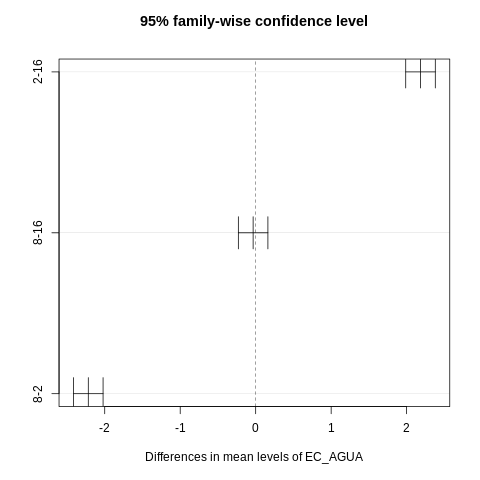

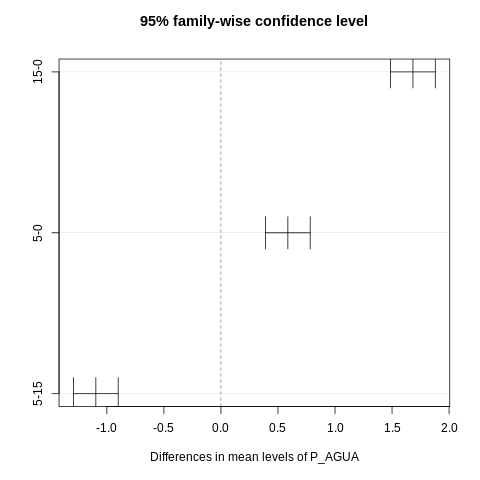

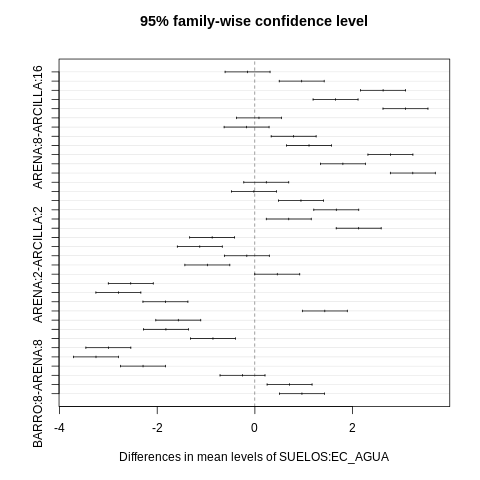

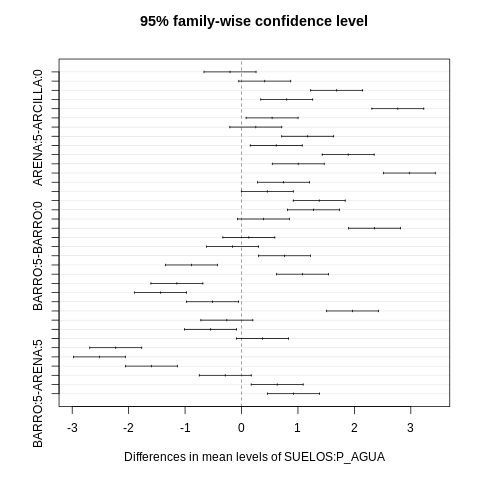

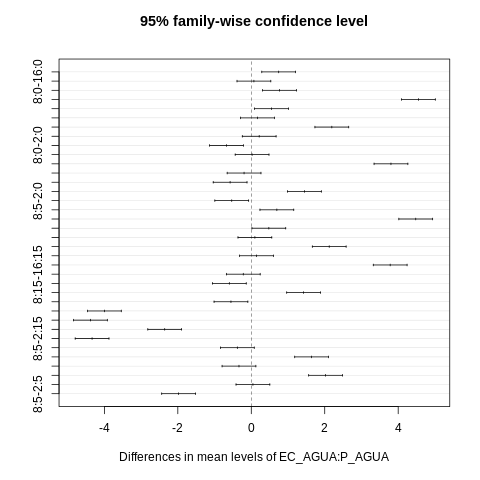

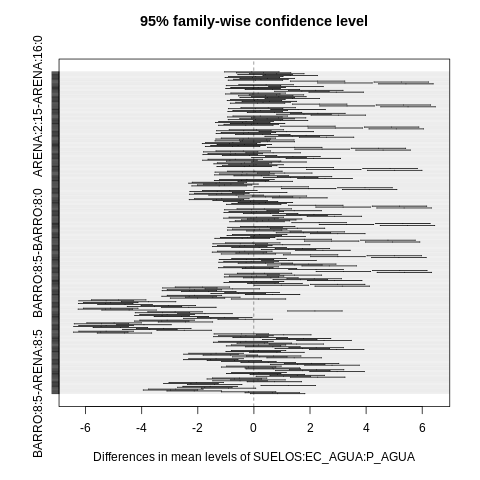

In [43]:
%%R
plot(TukeyHSD(h))

## **8. LSD - Comparaciones  Múltiples**

In [47]:
%%R
install.packages("agricolae")
library(agricolae)

### **a. Para Suelos**

In [48]:
%%R
LSD.test(modeloD3F,"SUELOS",console=TRUE)


Study: modeloD3F ~ "SUELOS"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means and individual ( 95 %) CI

        Electro_C      std  r         se       LCL       UCL  Min  Max    Q25
ARCILLA 1.1761111 1.677811 18 0.05584646 1.0615236 1.2906986 0.07 5.68 0.2375
ARENA   0.7172222 1.120577 18 0.05584646 0.6026348 0.8318097 0.05 3.47 0.0825
BARRO   1.8850000 1.596339 18 0.05584646 1.7704125 1.9995875 0.40 5.74 0.7350
          Q50    Q75
ARCILLA 0.375 0.9675
ARENA   0.155 0.5700
BARRO   1.275 2.6550

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


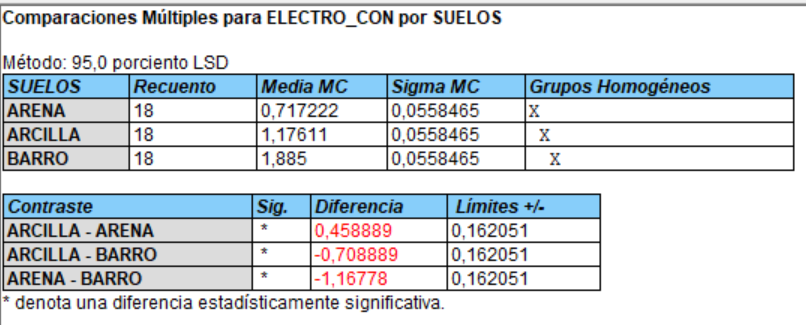


Study: modeloD3F ~ "SUELOS"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means and individual ( 95 %) CI

        Electro_C      std  r         se       LCL       UCL  Min  Max    Q25
ARCILLA 1.1761111 1.677811 18 0.05584646 1.0615236 1.2906986 0.07 5.68 0.2375
ARENA   0.7172222 1.120577 18 0.05584646 0.6026348 0.8318097 0.05 3.47 0.0825
BARRO   1.8850000 1.596339 18 0.05584646 1.7704125 1.9995875 0.40 5.74 0.7350
          Q50    Q75
ARCILLA 0.375 0.9675
ARENA   0.155 0.5700
BARRO   1.275 2.6550

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


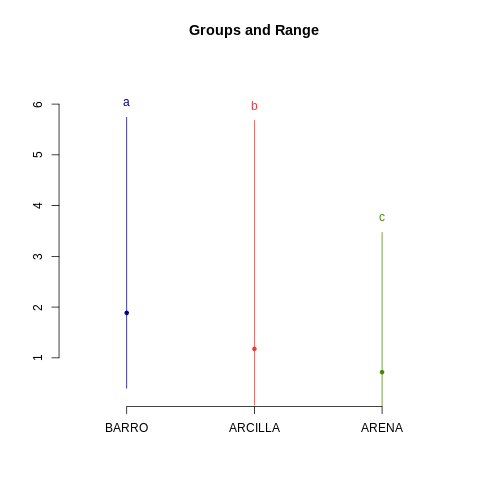

In [49]:
%%R
plot(LSD.test(modeloD3F,"SUELOS",console=TRUE))

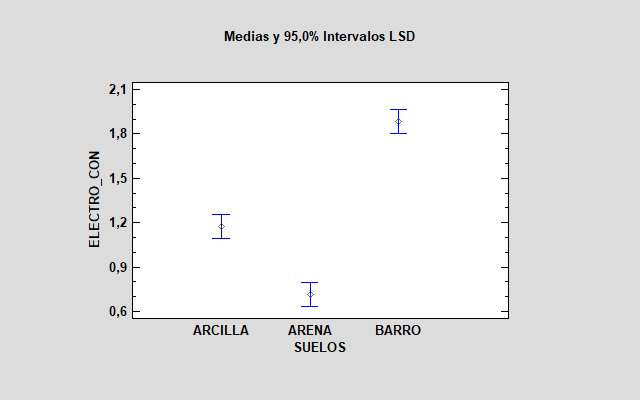

### **b. LSD  Para Salinidad del Agua**

In [53]:
%%R
LSD.test(modeloD3F,"EC_AGUA",console=TRUE)


Study: modeloD3F ~ "EC_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
16 0.5427778 0.7339563 18 0.05584646 0.4281903 0.6573652 0.06 2.87 0.1475 0.290
2  2.7266667 1.7634792 18 0.05584646 2.6120792 2.8412541 0.48 5.74 1.4025 2.345
8  0.5088889 0.5327386 18 0.05584646 0.3943014 0.6234764 0.05 2.10 0.1275 0.305
      Q75
16 0.5350
2  3.4300
8  0.7425

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


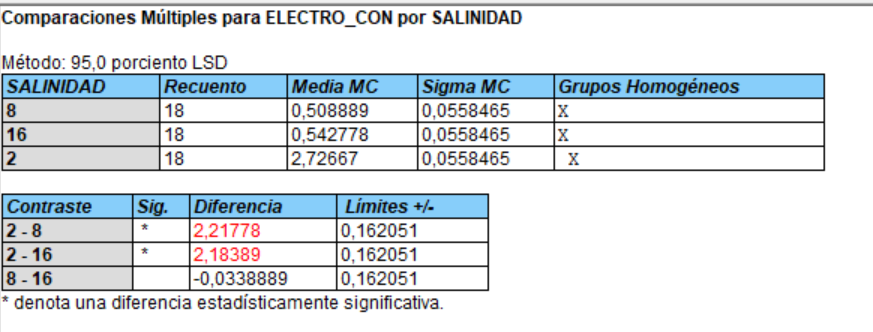


Study: modeloD3F ~ "EC_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
16 0.5427778 0.7339563 18 0.05584646 0.4281903 0.6573652 0.06 2.87 0.1475 0.290
2  2.7266667 1.7634792 18 0.05584646 2.6120792 2.8412541 0.48 5.74 1.4025 2.345
8  0.5088889 0.5327386 18 0.05584646 0.3943014 0.6234764 0.05 2.10 0.1275 0.305
      Q75
16 0.5350
2  3.4300
8  0.7425

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


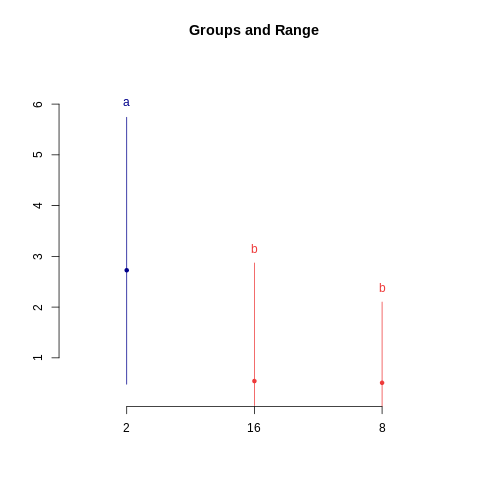

In [54]:
%%R
plot(LSD.test(modeloD3F,"EC_AGUA",console=TRUE))

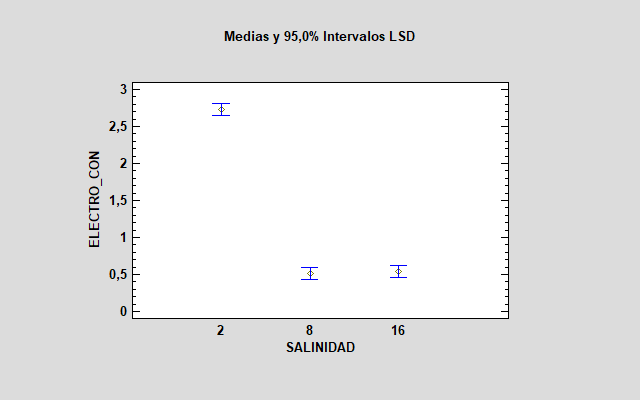

## **c. LSD Para Porcentaje de Agua**

In [55]:
%%R
LSD.test(modeloD3F,"P_AGUA",console=TRUE)


Study: modeloD3F ~ "P_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
0  0.5027778 0.4485507 18 0.05584646 0.3881903 0.6173652 0.05 1.50 0.1275 0.440
15 2.1861111 2.1166376 18 0.05584646 2.0715236 2.3006986 0.06 5.74 0.3625 1.565
5  1.0894444 1.0604853 18 0.05584646 0.9748570 1.2040319 0.08 3.31 0.2300 0.750
      Q75
0  0.6900
15 3.4275
5  1.9300

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


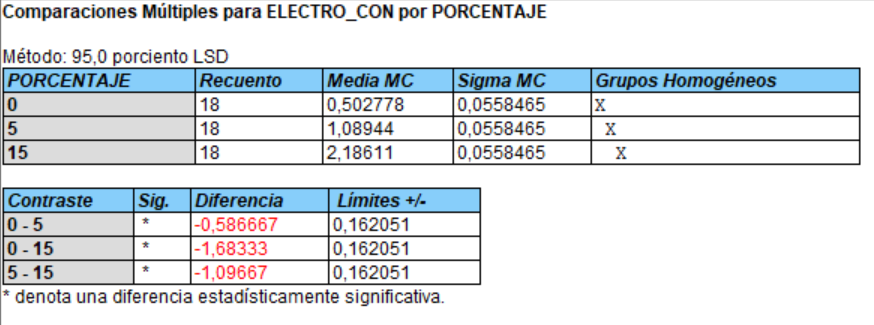


Study: modeloD3F ~ "P_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
0  0.5027778 0.4485507 18 0.05584646 0.3881903 0.6173652 0.05 1.50 0.1275 0.440
15 2.1861111 2.1166376 18 0.05584646 2.0715236 2.3006986 0.06 5.74 0.3625 1.565
5  1.0894444 1.0604853 18 0.05584646 0.9748570 1.2040319 0.08 3.31 0.2300 0.750
      Q75
0  0.6900
15 3.4275
5  1.9300

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


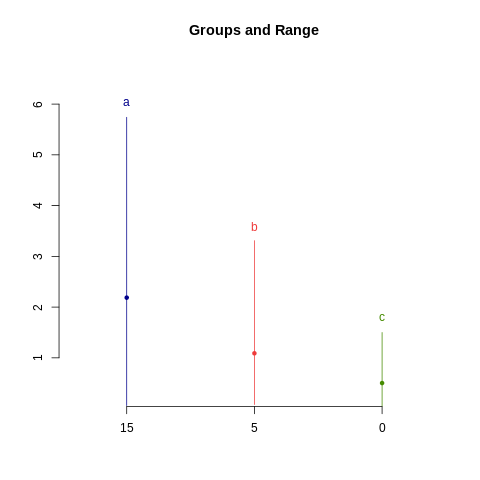

In [56]:
%%R
plot(LSD.test(modeloD3F,"P_AGUA",console=TRUE))

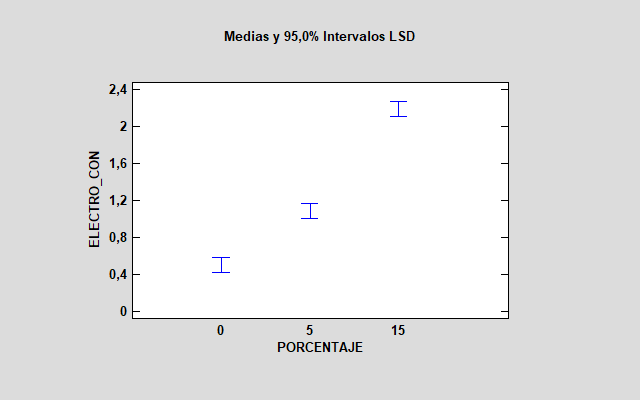

## **9. HSD - Comparaciones Múltiples**

In [57]:
### **d. Variables que contiene nuestro modelo: usando names(g)**
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


### **a. HSD para SUELOS - rangos múltiples**

In [59]:
%%R
HSD.test(modeloD3F,"SUELOS",console=TRUE)


Study: modeloD3F ~ "SUELOS"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


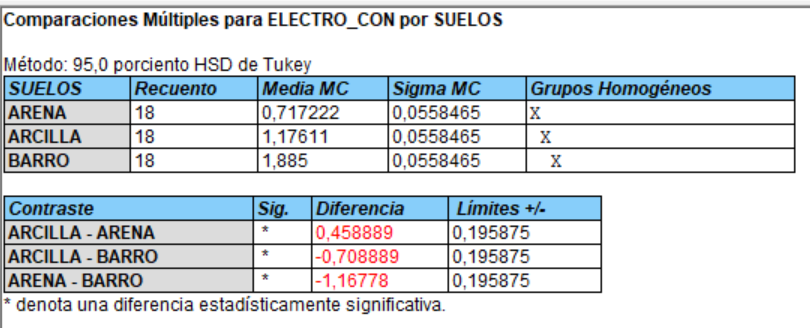

### **Gráficos: HSD para SUELOS - rangos múltiples**


Study: modeloD3F ~ "SUELOS"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


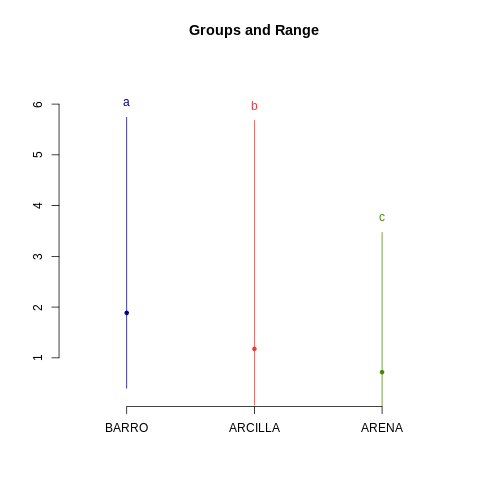

In [60]:
%%R
plot(HSD.test(modeloD3F,"SUELOS",console=TRUE))

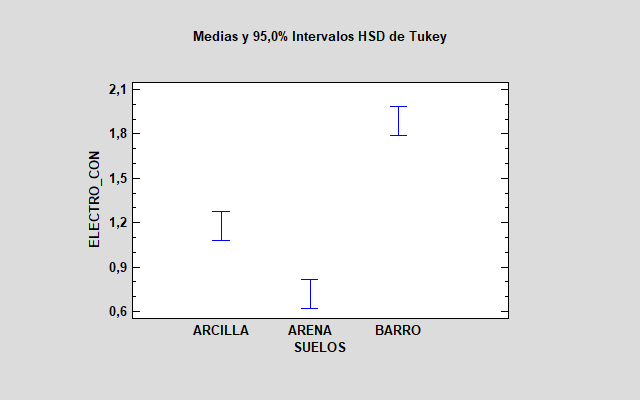

### **b. HSD para EC_AGUA - rangos múltiples**

In [61]:
### **d. Variables que contiene nuestro modelo: usando names(g)**
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


In [62]:
%%R
HSD.test(modeloD3F,"EC_AGUA",console=TRUE)


Study: modeloD3F ~ "EC_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
16 0.5427778 0.7339563 18 0.05584646 0.06 2.87 0.1475 0.290 0.5350
2  2.7266667 1.7634792 18 0.05584646 0.48 5.74 1.4025 2.345 3.4300
8  0.5088889 0.5327386 18 0.05584646 0.05 2.10 0.1275 0.305 0.7425

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


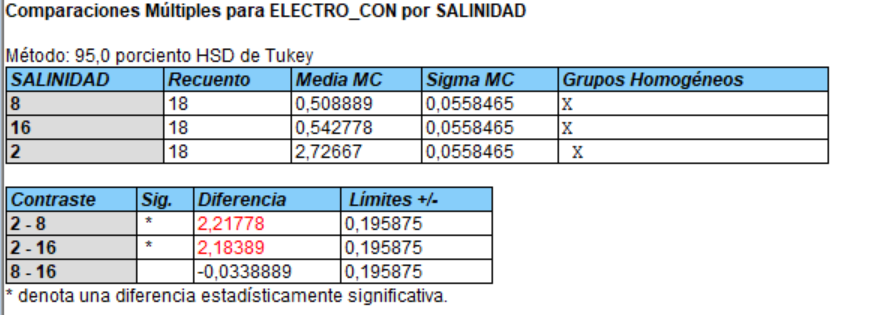

### **Gráfico HSD para EC_AGUA - rangos múltiples**


Study: modeloD3F ~ "EC_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
16 0.5427778 0.7339563 18 0.05584646 0.06 2.87 0.1475 0.290 0.5350
2  2.7266667 1.7634792 18 0.05584646 0.48 5.74 1.4025 2.345 3.4300
8  0.5088889 0.5327386 18 0.05584646 0.05 2.10 0.1275 0.305 0.7425

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


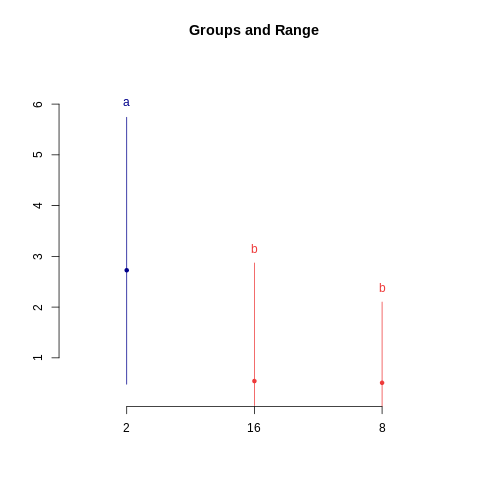

In [63]:
%%R
plot(HSD.test(modeloD3F,"EC_AGUA",console=TRUE))

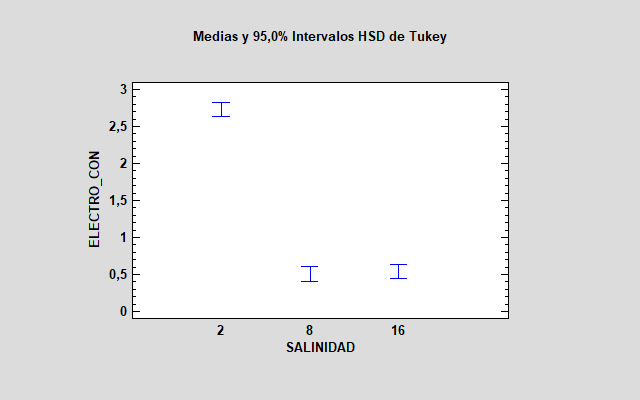

### **c. HSD para P_AGUA - rangos múltiples**

In [64]:
%%R
HSD.test(modeloD3F,"P_AGUA",console=TRUE)


Study: modeloD3F ~ "P_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
0  0.5027778 0.4485507 18 0.05584646 0.05 1.50 0.1275 0.440 0.6900
15 2.1861111 2.1166376 18 0.05584646 0.06 5.74 0.3625 1.565 3.4275
5  1.0894444 1.0604853 18 0.05584646 0.08 3.31 0.2300 0.750 1.9300

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


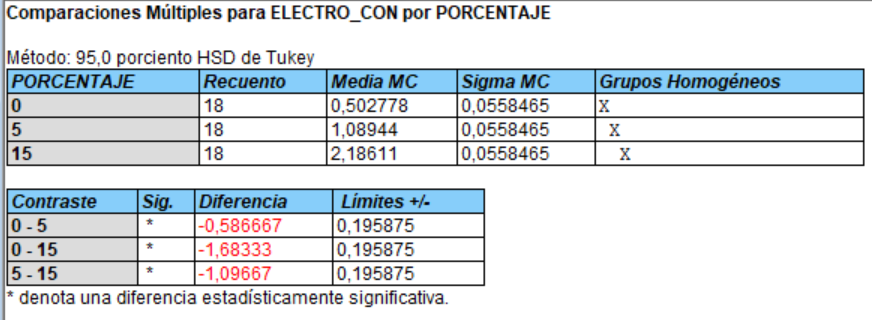

### **Gráficos: HSD para P_AGUA - rangos múltiples**


Study: modeloD3F ~ "P_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
0  0.5027778 0.4485507 18 0.05584646 0.05 1.50 0.1275 0.440 0.6900
15 2.1861111 2.1166376 18 0.05584646 0.06 5.74 0.3625 1.565 3.4275
5  1.0894444 1.0604853 18 0.05584646 0.08 3.31 0.2300 0.750 1.9300

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


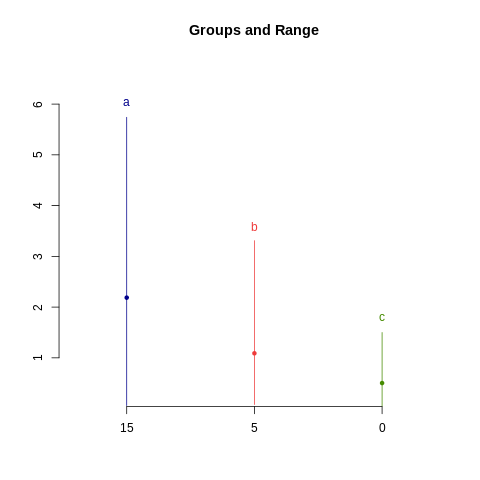

In [65]:
%%R
plot(HSD.test(modeloD3F,"P_AGUA",console=TRUE))

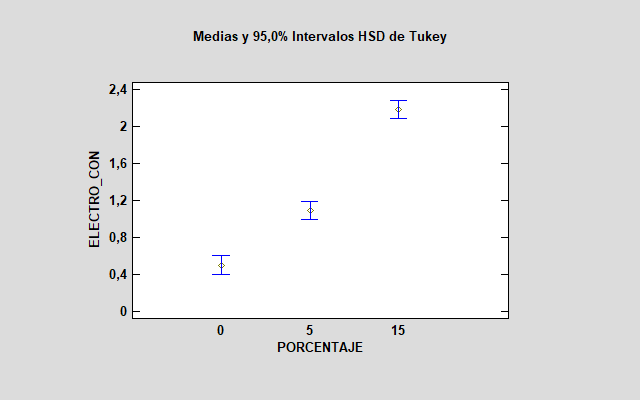

## **d. Prueba de Student-Newman-Keuls (SNK)**

In [66]:
## **c. Prueba de Student-Newman-Keuls (SNK)**
%%R
SNK.test(modeloD3F,"SUELOS",console=TRUE)


Study: modeloD3F ~ "SUELOS"

Student Newman Keuls Test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1958215 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


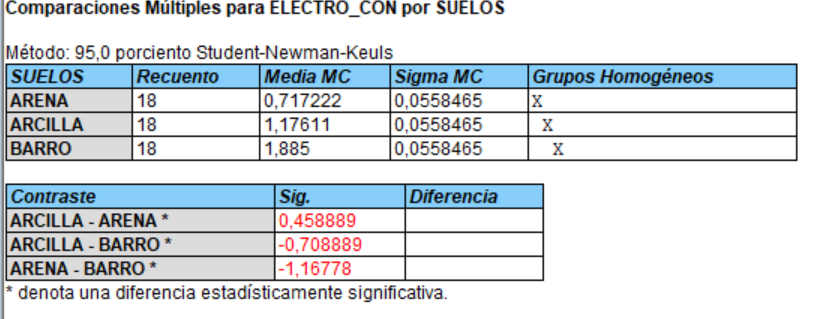

## **Grafico: Prueba de Student-Newman-Keuls (SNK)**


Study: modeloD3F ~ "SUELOS"

Student Newman Keuls Test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1958215 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


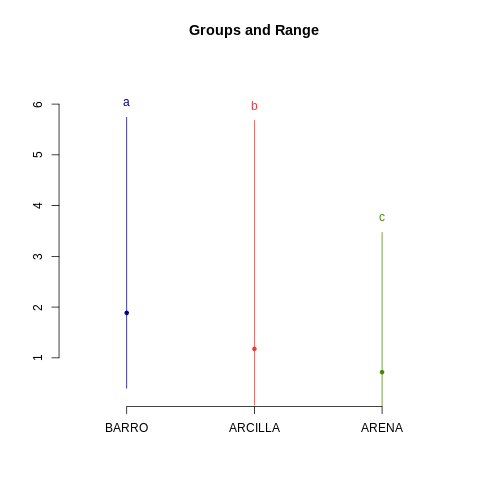

In [67]:
#Prueba de Student-Newman-Keuls (SNK)
%%R
plot(SNK.test(modeloD3F,"SUELOS",console=TRUE))

## **e. Prueba Prueba de Scheffé**

In [68]:
# Prueba de Scheffé
%%R
scheffe.test(modeloD3F,"SUELOS",console=TRUE)


Study: modeloD3F ~ "SUELOS"

Scheffe Test for Electro_C 

Mean Square Error  : 0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of F: 3.354131 

Minimum Significant Difference: 0.2045576 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


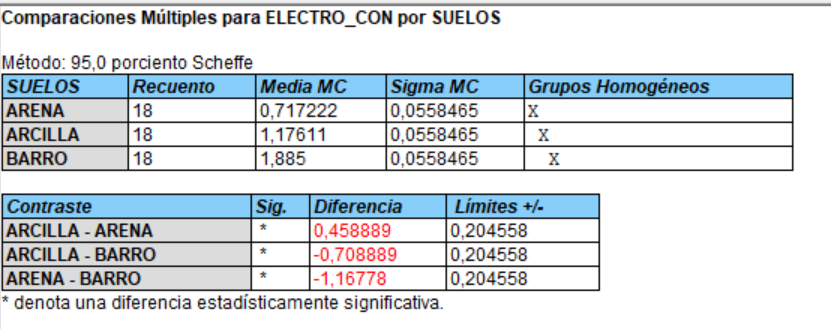

## **Gráfico Prueba Prueba de Scheffé**


Study: modeloD3F ~ "SUELOS"

Scheffe Test for Electro_C 

Mean Square Error  : 0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of F: 3.354131 

Minimum Significant Difference: 0.2045576 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


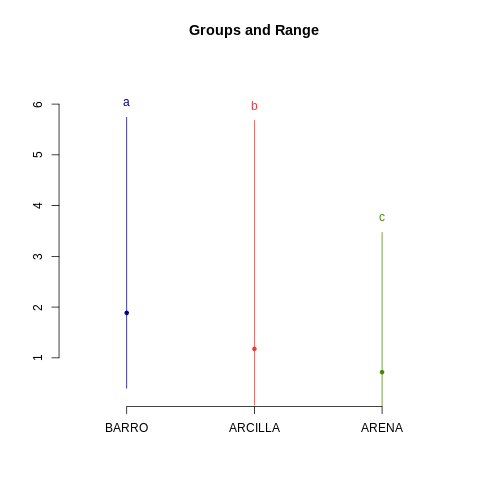

In [69]:
# Prueba de Scheffé
%%R
plot(scheffe.test(modeloD3F,"SUELOS",console=TRUE))

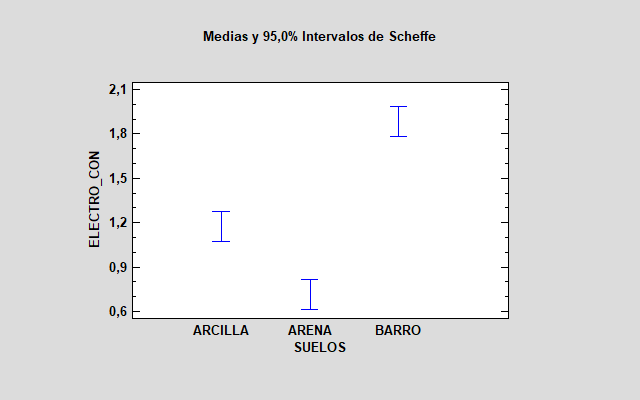

## **f. Prueba Prueba de Duncan**

In [70]:
#(j) Prueba de Duncan
%%R
duncan.test(modeloD3F,"SUELOS",console=TRUE)


Study: modeloD3F ~ "SUELOS"

Duncan's new multiple range test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1702570 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


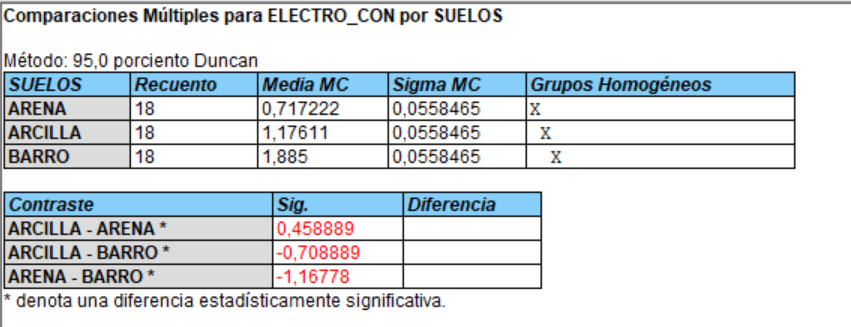

## **Gráfico Prueba Prueba de Duncan**


Study: modeloD3F ~ "SUELOS"

Duncan's new multiple range test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1702570 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


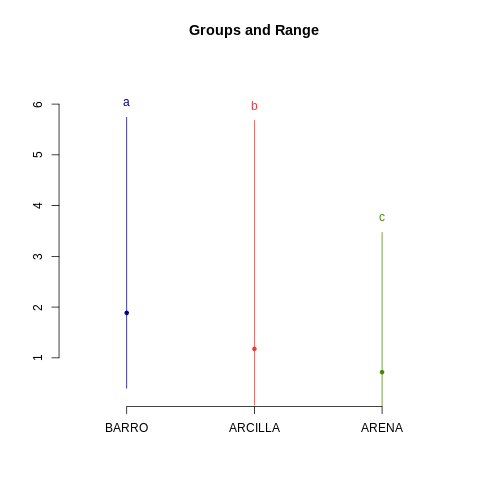

In [71]:
#(j) Prueba de Duncan
%%R
plot(duncan.test(modeloD3F,"SUELOS",console=TRUE))

# **10. Los residuos**

In [72]:
%%R
names(modeloD3F)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        


### **a. Boxplot - Residuales**

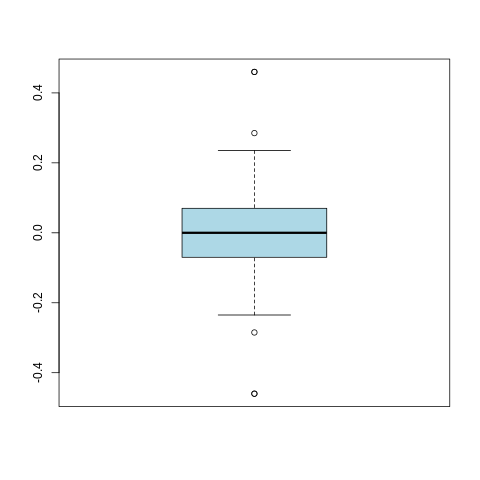

In [73]:
%%R
boxplot(modeloD3F$res, col = 'lightblue')

### **b. Histograma de Residuos - Grafica de Normalidad**

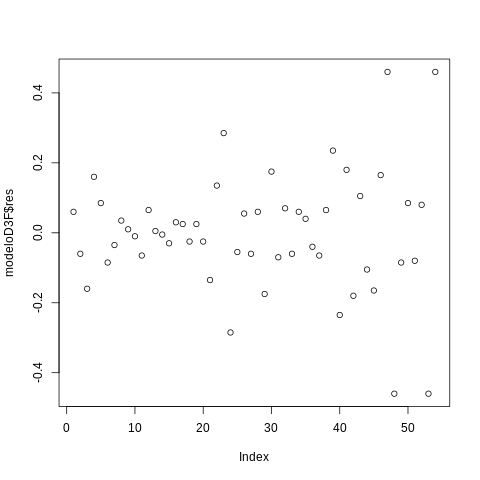

In [74]:
%%R
plot(modeloD3F$res)

In [76]:
%%R
summary(modeloD3F$res)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.46000 -0.06875  0.00000  0.00000  0.06875  0.46000 


In [77]:
%%R
sd(modeloD3F$res)

[1] 0.1691126


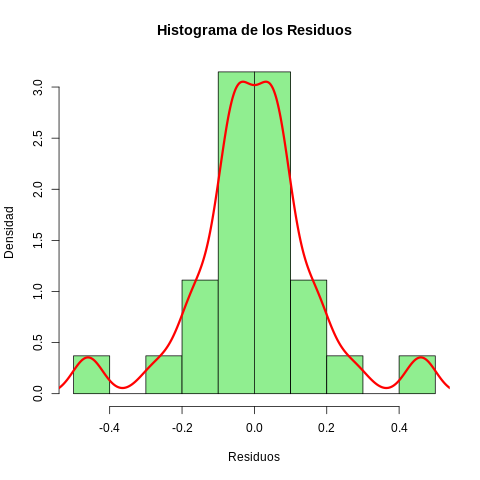

In [79]:
%%R
#(d) Supuesto del modelo:Normalidad de los residuos
hist(modeloD3F$residuals, col="lightgreen", main = "Histograma de los Residuos",
     freq = F, xlab="Residuos",ylab="Densidad")
lines(density(modeloD3F$residuals), col="red", lwd=3)

## **c. Normalidad con Shapiro Wilks**

In [80]:
# **Prueba de Shapiro Wilks**

%%R
shapiro.test(modeloD3F$res)


	Shapiro-Wilk normality test

data:  modeloD3F$res
W = 0.94361, p-value = 0.01322



## **d. Prueba de Normalidad con Q-Q Plot**

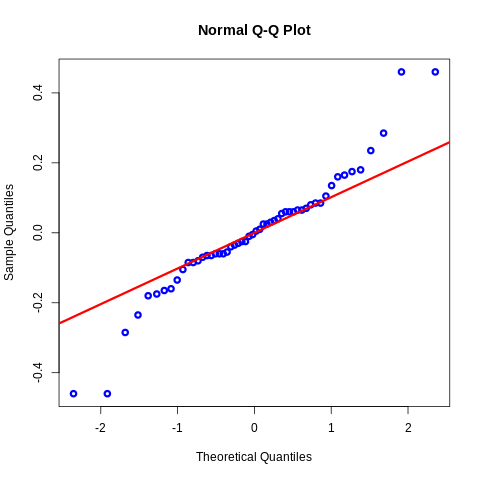

In [81]:
# ** Prueba de Normalidad con Q-Q Plot**
%%R
qqnorm(modeloD3F$residuals,col="blue", lwd=3)
qqline(modeloD3F$residuals,col="red", lwd=3)


## **e. Supuesto de Independencia**

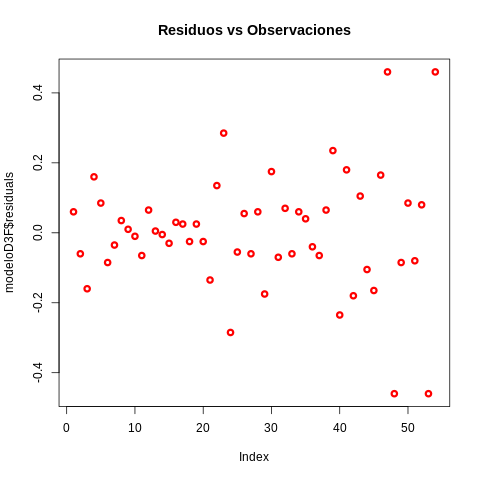

In [82]:
## **e. Supuesto de Independencia**
%%R

plot(modeloD3F$residuals,main = "Residuos vs Observaciones",col="red", lwd=3)

## **(f) Homocedasticidad - Prueba de Bartlett**

In [83]:
## **(f) Homocedasticidad**
%%R
bartlett.test(Electro_C~SUELOS)
#boxplot(anovaDBCA1$residuals~Bloques, xlab="Bloques",ylab="Residuos",
       # col = c("yellow", "blue", "white","green", "red"))


	Bartlett test of homogeneity of variances

data:  Electro_C by SUELOS
Bartlett's K-squared = 2.9145, df = 2, p-value = 0.2329



## **11. Homocedasticidad - Residuales vs Factores**

In [84]:
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


## **a. Homocedasticidad - Residuales vs Tipos de Suelos**

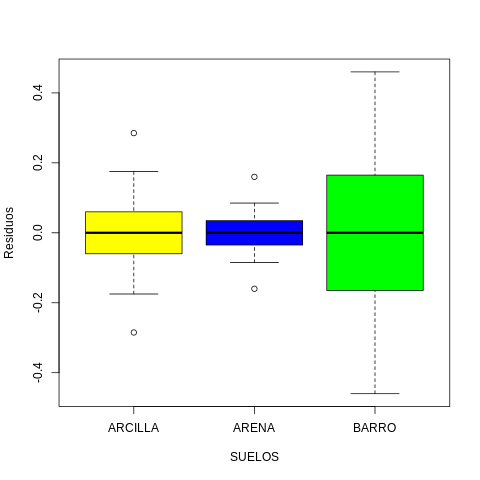

In [85]:
#(a) Homocedasticidad
%%R
boxplot(modeloD3F$residuals~D3F$SUELOS, xlab="SUELOS",ylab="Residuos",
       col = c("yellow", "blue", "green"))

## **b. Homocedasticidad - Residuales vs Tipos de Salinidad**

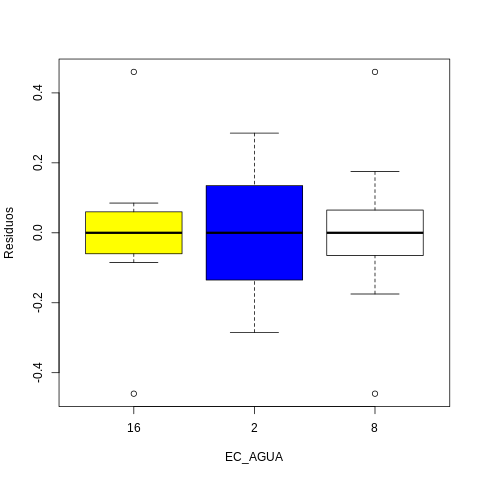

In [86]:
#(a) Homocedasticidad
%%R
boxplot(modeloD3F$residuals~D3F$EC_AGUA, xlab="EC_AGUA",ylab="Residuos",
       col = c("yellow", "blue", "white"))

## **c. Homocedasticidad - Residuales vs Tipos de Porcentajes de agua**

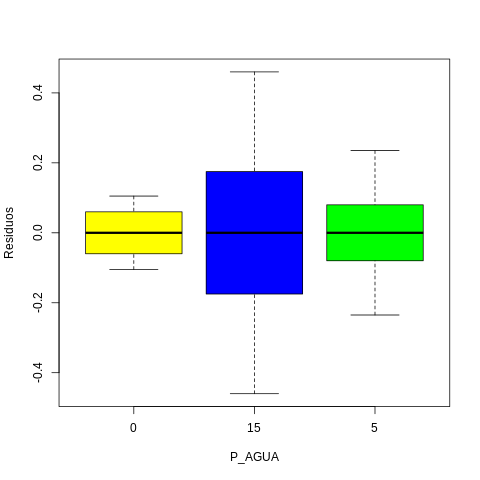

In [87]:
#(a) Homocedasticidad
%%R
boxplot(modeloD3F$residuals~D3F$P_AGUA, xlab="P_AGUA",ylab="Residuos",
       col = c("yellow", "blue", "green"))

# **12. Pasar de DataFrame a dataframe**

In [ ]:
# Importa las librerías necesarias
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

# Activa la conversión automática entre R y pandas
pandas2ri.activate()

# Ejecuta el código en R
ro.r('''
Electro_C <- c(0.60,0.48,1.69,2.01,3.47,3.30,0.05,0.12,0.11,0.09,0.06,0.19,
0.07,0.06,0.08,0.14,0.22,0.17,0.98,0.93,2.21,2.48,5.68,5.11,0.15,0.26,
0.23,0.35,0.40,0.75,0.07,0.21,0.23,0.35,0.43,0.35,1.37,1.50,3.31,2.84,5.74,
5.38,0.72,0.51,0.78,1.11,2.10,1.18,0.40,0.57,0.72,0.88,1.95,2.87)
SUELOS <- factor(c(rep("ARENA",18),
                rep("ARCILLA",18),
                rep("BARRO",18)))
EC_AGUA <- factor(c(rep("2",6),
                    rep("8",6),
                    rep("16",6)))
P_AGUA <- factor(c(rep("0",2),
                    rep("5",2),
                    rep("15",2)))

df <- data.frame(SUELOS, EC_AGUA, P_AGUA,Electro_C)
''')

# Convierte el dataframe de R a pandas
df = ro.r('df')

# Mostrar el dataframe en Python
print(df)


In [ ]:
import pandas as pd

# Datos
data = {
    'SUELOS': ['ARENA'] * 18 + ['ARCILLA'] * 18 + ['BARRO'] * 18,
    'EC_AGUA': ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6,
    'P_AGUA': ['0', '0', '5', '5', '15', '15'] * 9,
    'Electro_C': [
        0.60, 0.48, 1.69, 2.01, 3.47, 3.30, 0.05, 0.12, 0.11, 0.09, 0.06, 0.19,
        0.07, 0.06, 0.08, 0.14, 0.22, 0.17, 0.98, 0.93, 2.21, 2.48, 5.68, 5.11,
        0.15, 0.26, 0.23, 0.35, 0.40, 0.75, 0.07, 0.21, 0.23, 0.35, 0.43, 0.35,
        1.37, 1.50, 3.31, 2.84, 5.74, 5.38, 0.72, 0.51, 0.78, 1.11, 2.10, 1.18,
        0.40, 0.57, 0.72, 0.88, 1.95, 2.87
    ]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


In [27]:
Rango_Tukey = [[6.08,	8.33,	9.80,	10.88,	11.73,	12.43,	13.03,	13.54,	13.99,	14.40,	14.76,	15.09,	15.39,	15.67,	15.92,	16.16,	16.38,	16.59,	16.78,	16.97,	17.14,	17.30,	17.46,	17.61,	17.75,	17.88,	18.01,	18.13,	18.25],
[4.50,	5.91,	6.82,	7.50,	8.04,	8.48,	8.85,	9.18,	9.46,	9.72,	9.95,	10.15,	10.35,	10.52,	10.69,	10.84,	10.98,	11.11,	11.24,	11.36,	11.47,	11.58,	11.68,	11.78,	11.87,	11.96,	12.05,	12.13,	12.21],
[3.93,	5.04,	5.76,	6.29,	6.71,	7.05,	7.35,	7.60,	7.83,	8.03,	8.21,	8.37,	8.52,	8.66,	8.79,	8.91,	9.03,	9.13,	9.23,	9.33,	9.42,	9.50,	9.58,	9.66,	9.74,	9.81,	9.88,	9.94,	10.00],
[3.64,	4.60,	5.22,	5.67,	6.03,	6.33,	6.58,	6.80,	6.99,	7.17,	7.32,	7.47,	7.60,	7.72,	7.83,	7.93,	8.03,	8.12,	8.21,	8.29,	8.37,	8.44,	8.51,	8.58,	8.64,	8.70,	8.76,	8.82,	8.87],
[3.46,	4.34,	4.90,	5.30,	5.63,	5.90,	6.12,	6.32,	6.49,	6.65,	6.79,	6.92,	7.03,	7.14,	7.24,	7.34,	7.43,	7.51,	7.59,	7.66,	7.73,	7.80,	7.86,	7.92,	7.98,	8.03,	8.09,	8.14,	8.19],
[3.34,	4.16,	4.68,	5.06,	5.36,	5.61,	5.82,	6.00,	6.16,	6.30,	6.43,	6.55,	6.66,	6.76,	6.85,	6.94,	7.02,	7.10,	7.17,	7.24,	7.30,	7.36,	7.42,	7.48,	7.53,	7.58,	7.63,	7.68,	7.73],
[3.26,	4.04,	4.53,	4.89,	5.17,	5.40,	5.60,	5.77,	5.92,	6.05,	6.18,	6.29,	6.39,	6.48,	6.57,	6.65,	6.73,	6.80,	6.87,	6.93,	6.99,	7.05,	7.11,	7.16,	7.21,	7.26,	7.31,	7.35,	7.40],
[3.20,	3.95,	4.41,	4.76,	5.02,	5.24,	5.43,	5.59,	5.74,	5.87,	5.98,	6.09,	6.19,	6.28,	6.36,	6.44,	6.51,	6.58,	6.64,	6.70,	6.76,	6.82,	6.87,	6.92,	6.97,	7.02,	7.06,	7.10,	7.14],
[3.15,	3.88,	4.33,	4.65,	4.91,	5.12,	5.30,	5.46,	5.60,	5.72,	5.83,	5.93,	6.03,	6.11,	6.19,	6.27,	6.34,	6.40,	6.47,	6.53,	6.58,	6.63,	6.69,	6.73,	6.78,	6.82,	6.87,	6.91,	6.95],
[3.11,	3.82,	4.26,	4.57,	4.82,	5.03,	5.20,	5.35,	5.49,	5.61,	5.71,	5.81,	5.90,	5.98,	6.06,	6.13,	6.20,	6.27,	6.33,	6.38,	6.44,	6.49,	6.54,	6.58,	6.63,	6.67,	6.71,	6.75,	6.79],
[3.08,	3.77,	4.20,	4.51,	4.75,	4.95,	5.12,	5.27,	5.39,	5.51,	5.61,	5.71,	5.80,	5.88,	5.95,	6.02,	6.09,	6.15,	6.21,	6.26,	6.32,	6.37,	6.41,	6.46,	6.50,	6.54,	6.58,	6.62,	6.66],
[3.06,	3.73,	4.15,	4.45,	4.69,	4.88,	5.05,	5.19,	5.32,	5.43,	5.53,	5.63,	5.71,	5.79,	5.86,	5.93,	5.99,	6.05,	6.11,	6.17,	6.22,	6.26,	6.31,	6.36,	6.40,	6.44,	6.48,	6.52,	6.55],
[3.03,	3.70,	4.11,	4.41,	4.64,	4.83,	4.99,	5.13,	5.25,	5.36,	5.46,	5.55,	5.64,	5.71,	5.79,	5.85,	5.91,	5.97,	6.03,	6.08,	6.13,	6.18,	6.22,	6.27,	6.31,	6.35,	6.39,	6.42,	6.46],
[3.01,	3.67,	4.08,	4.37,	4.59,	4.78,	4.94,	5.08,	5.20,	5.31,	5.40,	5.49,	5.57,	5.65,	5.72,	5.78,	5.85,	5.90,	5.96,	6.01,	6.06,	6.10,	6.15,	6.19,	6.23,	6.27,	6.31,	6.34,	6.38],
[3.00,	3.65,	4.05,	4.33,	4.56,	4.74,	4.90,	5.03,	5.15,	5.26,	5.35,	5.44,	5.52,	5.59,	5.66,	5.73,	5.79,	5.84,	5.90,	5.95,	5.99,	6.04,	6.08,	6.13,	6.17,	6.20,	6.24,	6.28,	6.31],
[2.98,	3.63,	4.02,	4.30,	4.52,	4.70,	4.86,	4.99,	5.11,	5.21,	5.31,	5.39,	5.47,	5.54,	5.61,	5.67,	5.73,	5.79,	5.84,	5.89,	5.94,	5.98,	6.03,	6.07,	6.11,	6.14,	6.18,	6.22,	6.25],
[2.97,	3.61,	4.00,	4.28,	4.49,	4.67,	4.82,	4.96,	5.07,	5.17,	5.27,	5.35,	5.43,	5.50,	5.57,	5.63,	5.69,	5.74,	5.79,	5.84,	5.89,	5.93,	5.98,	6.02,	6.06,	6.09,	6.13,	6.16,	6.20],
[2.96,	3.59,	3.98,	4.25,	4.47,	4.65,	4.79,	4.92,	5.04,	5.14,	5.23,	5.31,	5.39,	5.46,	5.53,	5.59,	5.65,	5.70,	5.75,	5.80,	5.85,	5.89,	5.93,	5.97,	6.01,	6.05,	6.08,	6.11,	6.15],
[2.95,	3.58,	3.96,	4.23,	4.45,	4.62,	4.77,	4.90,	5.01,	5.11,	5.20,	5.28,	5.36,	5.43,	5.49,	5.55,	5.61,	5.66,	5.71,	5.76,	5.81,	5.85,	5.89,	5.93,	5.97,	6.00,	6.04,	6.07,	6.10],
[2.94,	3.56,	3.94,	4.21,	4.42,	4.60,	4.74,	4.87,	4.98,	5.08,	5.17,	5.25,	5.33,	5.40,	5.46,	5.52,	5.58,	5.63,	5.68,	5.73,	5.77,	5.81,	5.85,	5.89,	5.93,	5.97,	6.00,	6.03,	6.07],
[2.93,	3.55,	3.93,	4.20,	4.41,	4.58,	4.72,	4.85,	4.96,	5.06,	5.14,	5.23,	5.30,	5.37,	5.43,	5.49,	5.55,	5.60,	5.65,	5.69,	5.74,	5.78,	5.82,	5.86,	5.90,	5.93,	5.97,	6.00,	6.03],
[2.93,	3.54,	3.91,	4.18,	4.39,	4.56,	4.70,	4.83,	4.94,	5.03,	5.12,	5.20,	5.27,	5.34,	5.41,	5.46,	5.52,	5.57,	5.62,	5.67,	5.71,	5.75,	5.79,	5.83,	5.87,	5.90,	5.93,	5.97,	6.00],
[2.92,	3.53,	3.90,	4.17,	4.37,	4.54,	4.68,	4.81,	4.92,	5.01,	5.10,	5.18,	5.25,	5.32,	5.38,	5.44,	5.49,	5.55,	5.59,	5.64,	5.68,	5.72,	5.76,	5.80,	5.84,	5.87,	5.91,	5.94,	5.97],
[2.91,	3.52,	3.89,	4.15,	4.36,	4.53,	4.67,	4.79,	4.90,	4.99,	5.08,	5.16,	5.23,	5.30,	5.36,	5.42,	5.47,	5.52,	5.57,	5.62,	5.66,	5.70,	5.74,	5.78,	5.81,	5.85,	5.88,	5.91,	5.94],
[2.91,	3.51,	3.88,	4.14,	4.35,	4.51,	4.65,	4.77,	4.88,	4.98,	5.06,	5.14,	5.21,	5.28,	5.34,	5.40,	5.45,	5.50,	5.55,	5.59,	5.64,	5.68,	5.72,	5.75,	5.79,	5.82,	5.85,	5.89,	5.92],
[2.90,	3.51,	3.87,	4.13,	4.33,	4.50,	4.64,	4.76,	4.86,	4.96,	5.04,	5.12,	5.19,	5.26,	5.32,	5.38,	5.43,	5.48,	5.53,	5.57,	5.61,	5.66,	5.69,	5.73,	5.77,	5.80,	5.83,	5.86,	5.89],
[2.90,	3.50,	3.86,	4.12,	4.32,	4.49,	4.62,	4.74,	4.85,	4.94,	5.03,	5.11,	5.18,	5.24,	5.30,	5.36,	5.41,	5.46,	5.51,	5.55,	5.60,	5.64,	5.67,	5.71,	5.75,	5.78,	5.81,	5.84,	5.87],
[2.89,	3.49,	3.85,	4.11,	4.31,	4.47,	4.61,	4.73,	4.84,	4.93,	5.01,	5.09,	5.16,	5.23,	5.29,	5.34,	5.40,	5.44,	5.49,	5.54,	5.58,	5.62,	5.66,	5.69,	5.73,	5.76,	5.79,	5.82,	5.85],
[2.89,	3.49,	3.85,	4.10,	4.30,	4.46,	4.60,	4.72,	4.82,	4.92,	5.00,	5.08,	5.15,	5.21,	5.27,	5.33,	5.38,	5.43,	5.47,	5.52,	5.56,	5.60,	5.64,	5.67,	5.71,	5.74,	5.77,	5.80,	5.83],
[2.88,	3.48,	3.84,	4.09,	4.29,	4.45,	4.59,	4.71,	4.81,	4.90,	4.99,	5.06,	5.13,	5.20,	5.26,	5.31,	5.36,	5.41,	5.46,	5.50,	5.54,	5.58,	5.62,	5.66,	5.69,	5.72,	5.76,	5.79,	5.82],
[2.88,	3.48,	3.83,	4.09,	4.28,	4.45,	4.58,	4.70,	4.80,	4.89,	4.98,	5.05,	5.12,	5.18,	5.24,	5.30,	5.35,	5.40,	5.45,	5.49,	5.53,	5.57,	5.61,	5.64,	5.68,	5.71,	5.74,	5.77,	5.80],
[2.88,	3.47,	3.83,	4.08,	4.28,	4.44,	4.57,	4.69,	4.79,	4.88,	4.97,	5.04,	5.11,	5.17,	5.23,	5.29,	5.34,	5.39,	5.43,	5.48,	5.52,	5.56,	5.59,	5.63,	5.66,	5.69,	5.73,	5.76,	5.78],
[2.87,	3.47,	3.82,	4.07,	4.27,	4.43,	4.56,	4.68,	4.78,	4.87,	4.96,	5.03,	5.10,	5.16,	5.22,	5.27,	5.33,	5.37,	5.42,	5.46,	5.50,	5.54,	5.58,	5.61,	5.65,	5.68,	5.71,	5.74,	5.77],
[2.87,	3.46,	3.81,	4.07,	4.26,	4.42,	4.56,	4.67,	4.77,	4.86,	4.95,	5.02,	5.09,	5.15,	5.21,	5.26,	5.31,	5.36,	5.41,	5.45,	5.49,	5.53,	5.57,	5.60,	5.64,	5.67,	5.70,	5.73,	5.76],
[2.87,	3.46,	3.81,	4.06,	4.25,	4.41,	4.55,	4.66,	4.76,	4.85,	4.94,	5.01,	5.08,	5.14,	5.20,	5.25,	5.30,	5.35,	5.40,	5.44,	5.48,	5.52,	5.55,	5.59,	5.62,	5.66,	5.69,	5.72,	5.74],
[2.87,	3.45,	3.80,	4.05,	4.25,	4.41,	4.54,	4.66,	4.76,	4.85,	4.93,	5.00,	5.07,	5.13,	5.19,	5.24,	5.29,	5.34,	5.39,	5.43,	5.47,	5.51,	5.54,	5.58,	5.61,	5.64,	5.67,	5.70,	5.73],
[2.86,	3.45,	3.80,	4.05,	4.24,	4.40,	4.53,	4.65,	4.75,	4.84,	4.92,	4.99,	5.06,	5.12,	5.18,	5.23,	5.28,	5.33,	5.38,	5.42,	5.46,	5.50,	5.53,	5.57,	5.60,	5.63,	5.66,	5.69,	5.72],
[2.86,	3.45,	3.79,	4.04,	4.24,	4.39,	4.53,	4.64,	4.74,	4.83,	4.91,	4.98,	5.05,	5.11,	5.17,	5.22,	5.27,	5.32,	5.37,	5.41,	5.45,	5.49,	5.52,	5.56,	5.59,	5.62,	5.65,	5.68,	5.71],
[2.86,	3.44,	3.79,	4.04,	4.23,	4.39,	4.52,	4.63,	4.73,	4.82,	4.90,	4.98,	5.04,	5.11,	5.16,	5.22,	5.27,	5.31,	5.36,	5.40,	5.44,	5.48,	5.51,	5.55,	5.58,	5.61,	5.64,	5.67,	5.70],
[2.86,	3.44,	3.79,	4.03,	4.23,	4.38,	4.51,	4.63,	4.73,	4.82,	4.90,	4.97,	5.04,	5.10,	5.15,	5.21,	5.26,	5.30,	5.35,	5.39,	5.43,	5.47,	5.50,	5.54,	5.57,	5.60,	5.63,	5.66,	5.69],
[2.85,	3.44,	3.78,	4.03,	4.22,	4.38,	4.51,	4.62,	4.72,	4.81,	4.89,	4.96,	5.03,	5.09,	5.15,	5.20,	5.25,	5.30,	5.34,	5.38,	5.42,	5.46,	5.50,	5.53,	5.56,	5.59,	5.62,	5.65,	5.68],
[2.85,	3.43,	3.78,	4.03,	4.22,	4.37,	4.50,	4.62,	4.72,	4.80,	4.88,	4.96,	5.02,	5.08,	5.14,	5.19,	5.24,	5.29,	5.33,	5.37,	5.41,	5.45,	5.49,	5.52,	5.55,	5.58,	5.61,	5.64,	5.67],
[2.85,	3.43,	3.78,	4.02,	4.21,	4.37,	4.50,	4.61,	4.71,	4.80,	4.88,	4.95,	5.02,	5.08,	5.13,	5.19,	5.24,	5.28,	5.33,	5.37,	5.41,	5.44,	5.48,	5.51,	5.55,	5.58,	5.61,	5.64,	5.66],
[2.85,	3.43,	3.77,	4.02,	4.21,	4.36,	4.49,	4.61,	4.70,	4.79,	4.87,	4.94,	5.01,	5.07,	5.13,	5.18,	5.23,	5.28,	5.32,	5.36,	5.40,	5.44,	5.47,	5.51,	5.54,	5.57,	5.60,	5.63,	5.66],
[2.85,	3.42,	3.77,	4.01,	4.20,	4.36,	4.49,	4.60,	4.70,	4.79,	4.87,	4.94,	5.00,	5.06,	5.12,	5.17,	5.22,	5.27,	5.31,	5.35,	5.39,	5.43,	5.46,	5.50,	5.53,	5.56,	5.59,	5.62,	5.65],
[2.85,	3.42,	3.77,	4.01,	4.20,	4.36,	4.48,	4.60,	4.69,	4.78,	4.86,	4.93,	5.00,	5.06,	5.11,	5.17,	5.22,	5.26,	5.31,	5.35,	5.39,	5.42,	5.46,	5.49,	5.52,	5.55,	5.58,	5.61,	5.64],
[2.84,	3.42,	3.76,	4.01,	4.20,	4.35,	4.48,	4.59,	4.69,	4.78,	4.86,	4.93,	4.99,	5.05,	5.11,	5.16,	5.21,	5.26,	5.30,	5.34,	5.38,	5.42,	5.45,	5.48,	5.52,	5.55,	5.58,	5.61,	5.63],
[2.84,	3.42,	3.76,	4.00,	4.19,	4.35,	4.48,	4.59,	4.69,	4.77,	4.85,	4.92,	4.99,	5.05,	5.10,	5.16,	5.20,	5.25,	5.29,	5.33,	5.37,	5.41,	5.44,	5.48,	5.51,	5.54,	5.57,	5.60,	5.63],
[2.84,	3.42,	3.76,	4.00,	4.19,	4.34,	4.47,	4.58,	4.68,	4.77,	4.85,	4.92,	4.98,	5.04,	5.10,	5.15,	5.20,	5.24,	5.29,	5.33,	5.37,	5.40,	5.44,	5.47,	5.50,	5.53,	5.56,	5.59,	5.62]]


In [28]:
RST_Q = pd.DataFrame(Rango_Tukey)
RST_Q

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,6.08,8.33,9.80,10.88,11.73,12.43,13.03,13.54,13.99,14.40,...,16.97,17.14,17.30,17.46,17.61,17.75,17.88,18.01,18.13,18.25
1,4.50,5.91,6.82,7.50,8.04,8.48,8.85,9.18,9.46,9.72,...,11.36,11.47,11.58,11.68,11.78,11.87,11.96,12.05,12.13,12.21
2,3.93,5.04,5.76,6.29,6.71,7.05,7.35,7.60,7.83,8.03,...,9.33,9.42,9.50,9.58,9.66,9.74,9.81,9.88,9.94,10.00
3,3.64,4.60,5.22,5.67,6.03,6.33,6.58,6.80,6.99,7.17,...,8.29,8.37,8.44,8.51,8.58,8.64,8.70,8.76,8.82,8.87
4,3.46,4.34,4.90,5.30,5.63,5.90,6.12,6.32,6.49,6.65,...,7.66,7.73,7.80,7.86,7.92,7.98,8.03,8.09,8.14,8.19
5,3.34,4.16,4.68,5.06,5.36,5.61,5.82,6.00,6.16,6.30,...,7.24,7.30,7.36,7.42,7.48,7.53,7.58,7.63,7.68,7.73
6,3.26,4.04,4.53,4.89,5.17,5.40,5.60,5.77,5.92,6.05,...,6.93,6.99,7.05,7.11,7.16,7.21,7.26,7.31,7.35,7.40
7,3.20,3.95,4.41,4.76,5.02,5.24,5.43,5.59,5.74,5.87,...,6.70,6.76,6.82,6.87,6.92,6.97,7.02,7.06,7.10,7.14
8,3.15,3.88,4.33,4.65,4.91,5.12,5.30,5.46,5.60,5.72,...,6.53,6.58,6.63,6.69,6.73,6.78,6.82,6.87,6.91,6.95
9,3.11,3.82,4.26,4.57,4.82,5.03,5.20,5.35,5.49,5.61,...,6.38,6.44,6.49,6.54,6.58,6.63,6.67,6.71,6.75,6.79


In [38]:
RST_Q[3][33]
RST_Q[1][25]

3.51